# Overall visualization of our data 

Let's start by loading our data :

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plot import *

og_df = pd.read_csv('/Volumes/LaCie/EPFL/Mastersem3/Semester Project Lsens/Data/Overall/overall_combined.csv')

In [2]:
og_df[ (og_df['mouse_id']=='AB120_20240811_143102') & (og_df['cluster_id']==1)]

cluster_id ccf_acronym   ccf_name  ccf_parent_id ccf_parent_acronym  \
0              1         CA3  Field CA3          375.0                 CA   
259            1         CA3  Field CA3          375.0                 CA   
518            1         CA3  Field CA3          375.0                 CA   
777            1         CA3  Field CA3          375.0                 CA   
1036           1         CA3  Field CA3          375.0                 CA   
1295           1         CA3  Field CA3          375.0                 CA   
1554           1         CA3  Field CA3          375.0                 CA   
1813           1         CA3  Field CA3          375.0                 CA   
2072           1         CA3  Field CA3          375.0                 CA   
2331           1         CA3  Field CA3          375.0                 CA   

     ccf_parent_name                                        spike_times  \
0       Ammon's horn  [1.10997831e-02 3.79359254e-01 4.41958031e-01 ...   
259     Ammon's horn  [1.10997831e-02 3.79359254e-01 4.41958031e-01 ...   
518     Ammon's horn  [1.10997831e-02 3.79359254e-01 4.41958031e-01 ...   
777     Ammon's horn  [1.10997831e-02 3.79359254e-01 4.41958031e-01 ...   
1036    Ammon's horn  [1.10997831e-02 3.79359254e-01 4.41958031e-01 ...   
1295    Ammon's horn  [1.10997831e-02 3.79359254e-01 4.41958031e-01 ...   
1554    Ammon's horn  [1.10997831e-02 3.79359254e-01 4.41958031e-01 ...   
1813    Ammon's horn  [1.10997831e-02 3.79359254e-01 4.41958031e-01 ...   
2072    Ammon's horn  [1.10997831e-02 3.79359254e-01 4.41958031e-01 ...   
2331    Ammon's horn  [1.10997831e-02 3.79359254e-01 4.41958031e-01 ...   

                   mouse_id       context              event  ...  \
0     AB120_20240811_143102        active            whisker  ...   
259   AB120_20240811_143102   passive_pre            whisker  ...   
518   AB120_20240811_143102  passive_post            whisker  ...   
777   AB120_20240811_143102        active           auditory  ...   
1036  AB120_20240811_143102   passive_pre           auditory  ...   
1295  AB120_20240811_143102  passive_post           auditory  ...   
1554  AB120_20240811_143102        active          wh_vs_aud  ...   
1813  AB120_20240811_143102   passive_pre          wh_vs_aud  ...   
2072  AB120_20240811_143102  passive_post          wh_vs_aud  ...   
2331  AB120_20240811_143102           NaN  spontaneous_licks  ...   

     Transformed AUC p-values positive  p-values negative  selective  \
0           0.114714             0.812              0.188      False   
259         0.114714             0.992              0.008       True   
518         0.114714             0.858              0.143      False   
777         0.114714             0.371              0.630      False   
1036        0.114714             0.116              0.886      False   
1295        0.114714             0.330              0.672      False   
1554       -0.061678             0.286              0.715      False   
1813       -0.458874             0.006              0.994       True   
2072       -0.127451             0.175              0.826      False   
2331        0.114714             1.000              0.000       True   

      direction  pre_time  post_time area_acronym  has context  wh_reward  
0          none       0.2        0.2          CA3        False         R-  
259    negative       0.2        0.2          CA3        False         R-  
518        none       0.2        0.2          CA3        False         R-  
777        none       0.2        0.2          CA3        False         R-  
1036       none       0.2        0.2          CA3        False         R-  
1295       none       0.2        0.2          CA3        False         R-  
1554       none       0.2        0.2          CA3        False         R-  
1813   positive       0.2        0.2          CA3        False         R-  
2072       none       0.2        0.2          CA3        False         R-  
2331   negative    

### Now we want to filter out on whether the number of occurrences of the same region is smaller than 20, you can use the groupby and transform functions. 

In [3]:
df = og_df[og_df.groupby(['area_acronym', 'event'])['area_acronym'].transform('count') >= 20]
df = df[df['area_acronym']!= 'VL']

In [59]:
df[df['event']=='spontaneous_licks']

cluster_id ccf_acronym                                     ccf_name  \
2331             1         CA3                                    Field CA3   
2332             5         CA3                                    Field CA3   
2333             9         CA3                                    Field CA3   
2334            12         CA3                                    Field CA3   
2335            14         CA3                                    Field CA3   
...            ...         ...                                          ...   
122889         644     SSp-m6a  Primary somatosensory area, mouth, layer 6a   
122890         646     SSp-m6a  Primary somatosensory area, mouth, layer 6a   
122891         647     SSp-m6a  Primary somatosensory area, mouth, layer 6a   
122892         650      SSp-m5   Primary somatosensory area, mouth, layer 5   
122893         658      SSp-m4   Primary somatosensory area, mouth, layer 4   

        ccf_parent_id ccf_parent_acronym                    ccf_parent_name  \
2331            375.0                 CA                       Ammon's horn   
2332            375.0                 CA                       Ammon's horn   
2333            375.0                 CA                       Ammon's horn   
2334            375.0                 CA                       Ammon's horn   
2335            375.0                 CA                       Ammon's horn   
...               ...                ...                                ...   
122889          345.0              SSp-m  Primary somatosensory area, mouth   
122890          345.0              SSp-m  Primary somatosensory area, mouth   
122891          345.0              SSp-m  Primary somatosensory area, mouth   
122892          345.0              SSp-m  Primary somatosensory area, mouth   
122893          345.0              SSp-m  Primary somatosensory area, mouth   

                                              spike_times  \
2331    [1.10997831e-02 3.79359254e-01 4.41958031e-01 ...   
2332    [8.50683378e-01 8.61316503e-01 8.73749594e-01 ...   
2333    [8.57983235e-02 1.90962935e-01 2.93227604e-01 ...   
2334    [8.19650651e-02 1.73179949e+00 2.62854864e+00 ...   
2335    [4.24688368e+00 5.92881749e+00 6.04198194e+00 ...   
...                                                   ...   
122889  [4.82992796e-02 3.64093569e+00 4.10362446e+00 ...   
122890  [   4.45451922    5.01817748    5.58706533    ...   
122891  [3.12295342e-01 3.82394296e-01 5.38191972e-01 ...   
122892  [1.98969965e+00 2.33309120e+00 3.46880493e+00 ...   
122893  [  13.68601619   13.70001598   25.09173739   2...   

                     mouse_id context              event  ... Transformed AUC  \
2331    AB120_20240811_143102     NaN  spontaneous_licks  ...        0.114714   
2332    AB120_20240811_143102     NaN  spontaneous_licks  ...        0.088271   
2333    AB120_20240811_143102     NaN  spontaneous_licks  ...        0.060016   
2334    AB120_20240811_143102     NaN  spontaneous_licks  ...        0.014756   
2335    AB120_20240811_143102     NaN  spontaneous_licks  ...        0.081816   
...                       ...     ...                ...  ...             ...   
122889  AB107_20240318_121423     NaN  spontaneous_licks  ...        0.032883   
122890  AB107_20240318_121423     NaN  spontaneous_licks  ...       -0.014349   
122891  AB107_20240318_121423     NaN  spontaneous_licks  ...        0.137755   
122892  AB107_20240318_121423     NaN  spontaneous_licks  ...        0.065957   
122893  AB107_20240318_121423     NaN  spontaneous_licks  ...        0.340906   

       p-values positive  p-values negative  selective  direction  pre_time  \
2331               1.000              0.000       True   negative       0.2   
2332               0.979              0.021       True   negative       0.2   
2333               0.942              0.058      False       none       0.2   
2334               0.763              0.237      False       none       0.2   
2335     

### Now let's visualize the overall data:

In [35]:
display(df.head())

cluster_id ccf_acronym   ccf_name  ccf_parent_id ccf_parent_acronym  \
0           1         CA3  Field CA3          375.0                 CA   
1           5         CA3  Field CA3          375.0                 CA   
2           9         CA3  Field CA3          375.0                 CA   
3          12         CA3  Field CA3          375.0                 CA   
4          14         CA3  Field CA3          375.0                 CA   

  ccf_parent_name                                        spike_times  \
0    Ammon's horn  [1.10997831e-02 3.79359254e-01 4.41958031e-01 ...   
1    Ammon's horn  [8.50683378e-01 8.61316503e-01 8.73749594e-01 ...   
2    Ammon's horn  [8.57983235e-02 1.90962935e-01 2.93227604e-01 ...   
3    Ammon's horn  [8.19650651e-02 1.73179949e+00 2.62854864e+00 ...   
4    Ammon's horn  [4.24688368e+00 5.92881749e+00 6.04198194e+00 ...   

                mouse_id context    event  ...       AUC Transformed AUC  \
0  AB120_20240811_143102  active  whisker  ...  0.511540        0.023079   
1  AB120_20240811_143102  active  whisker  ...  0.496881       -0.006239   
2  AB120_20240811_143102  active  whisker  ...  0.498041       -0.003917   
3  AB120_20240811_143102  active  whisker  ...  0.488184       -0.023633   
4  AB120_20240811_143102  active  whisker  ...  0.477341       -0.045318   

   p-values positive  p-values negative  selective  direction  pre_time  \
0              0.822              0.178      False       none       0.2   
1              0.877              0.123      False       none       0.2   
2              0.889              0.111      False       none       0.2   
3              0.775              0.245      False       none       0.2   
4              0.877              0.123      False       none       0.2   

  post_time  area_acronym  has context  
0       0.2           CA3        False  
1       0.2           CA3        False  
2       0.2           CA3        False  
3       0.2           CA3        False  
4       0.2           CA3        False  

[5 rows x 22 columns]

### Start with overall selectivity aggregated throughout the different areas

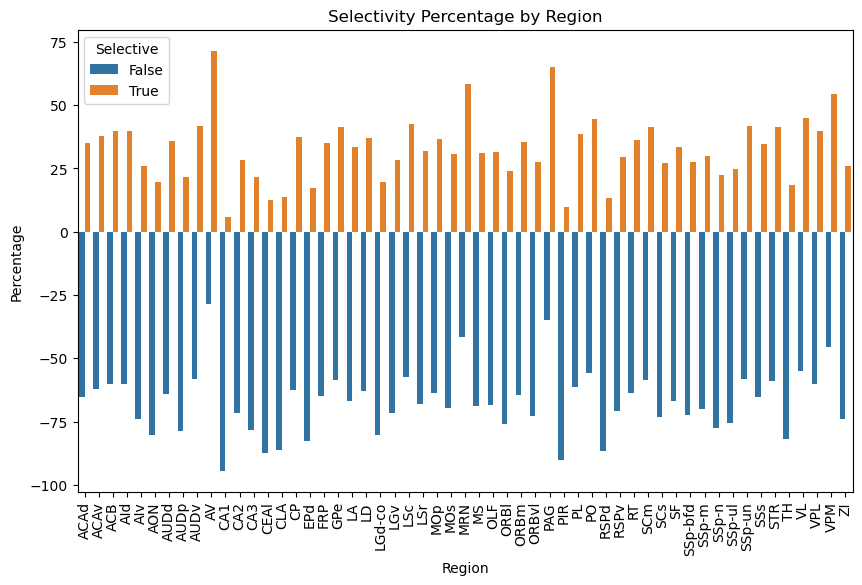

In [6]:
#percentage of selective neurons for each region
percentage_df = df.groupby(['area_acronym', 'selective']).size().reset_index(name='count')
total_counts = percentage_df.groupby('area_acronym')['count'].transform('sum')
percentage_df['percentage'] = (percentage_df['count'] / total_counts) * 100

# to get the false on the bottom
percentage_df.loc[percentage_df['selective'] == False, 'percentage'] *= -1

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='area_acronym', y='percentage', hue='selective', data=percentage_df)
plt.title('Selectivity Percentage by Region')
plt.ylabel('Percentage')
plt.xlabel('Region')
plt.xticks(rotation = 90)
plt.legend(title='Selective')
plt.show()

### Selectivity averaged over each mice and area_regions

/var/folders/p6/m1p5k4zj0yn9mk66d_dh7pn40000gn/T/ipykernel_56548/3658901017.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/p6/m1p5k4zj0yn9mk66d_dh7pn40000gn/T/ipykernel_56548/3658901017.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/p6/m1p5k4zj0yn9mk66d_dh7pn40000gn/T/ipykernel_56548/3658901017.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/p6/m1p5k4zj0yn9mk66d_dh7pn40000gn/T/ipykernel_56548/3658901017.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of t

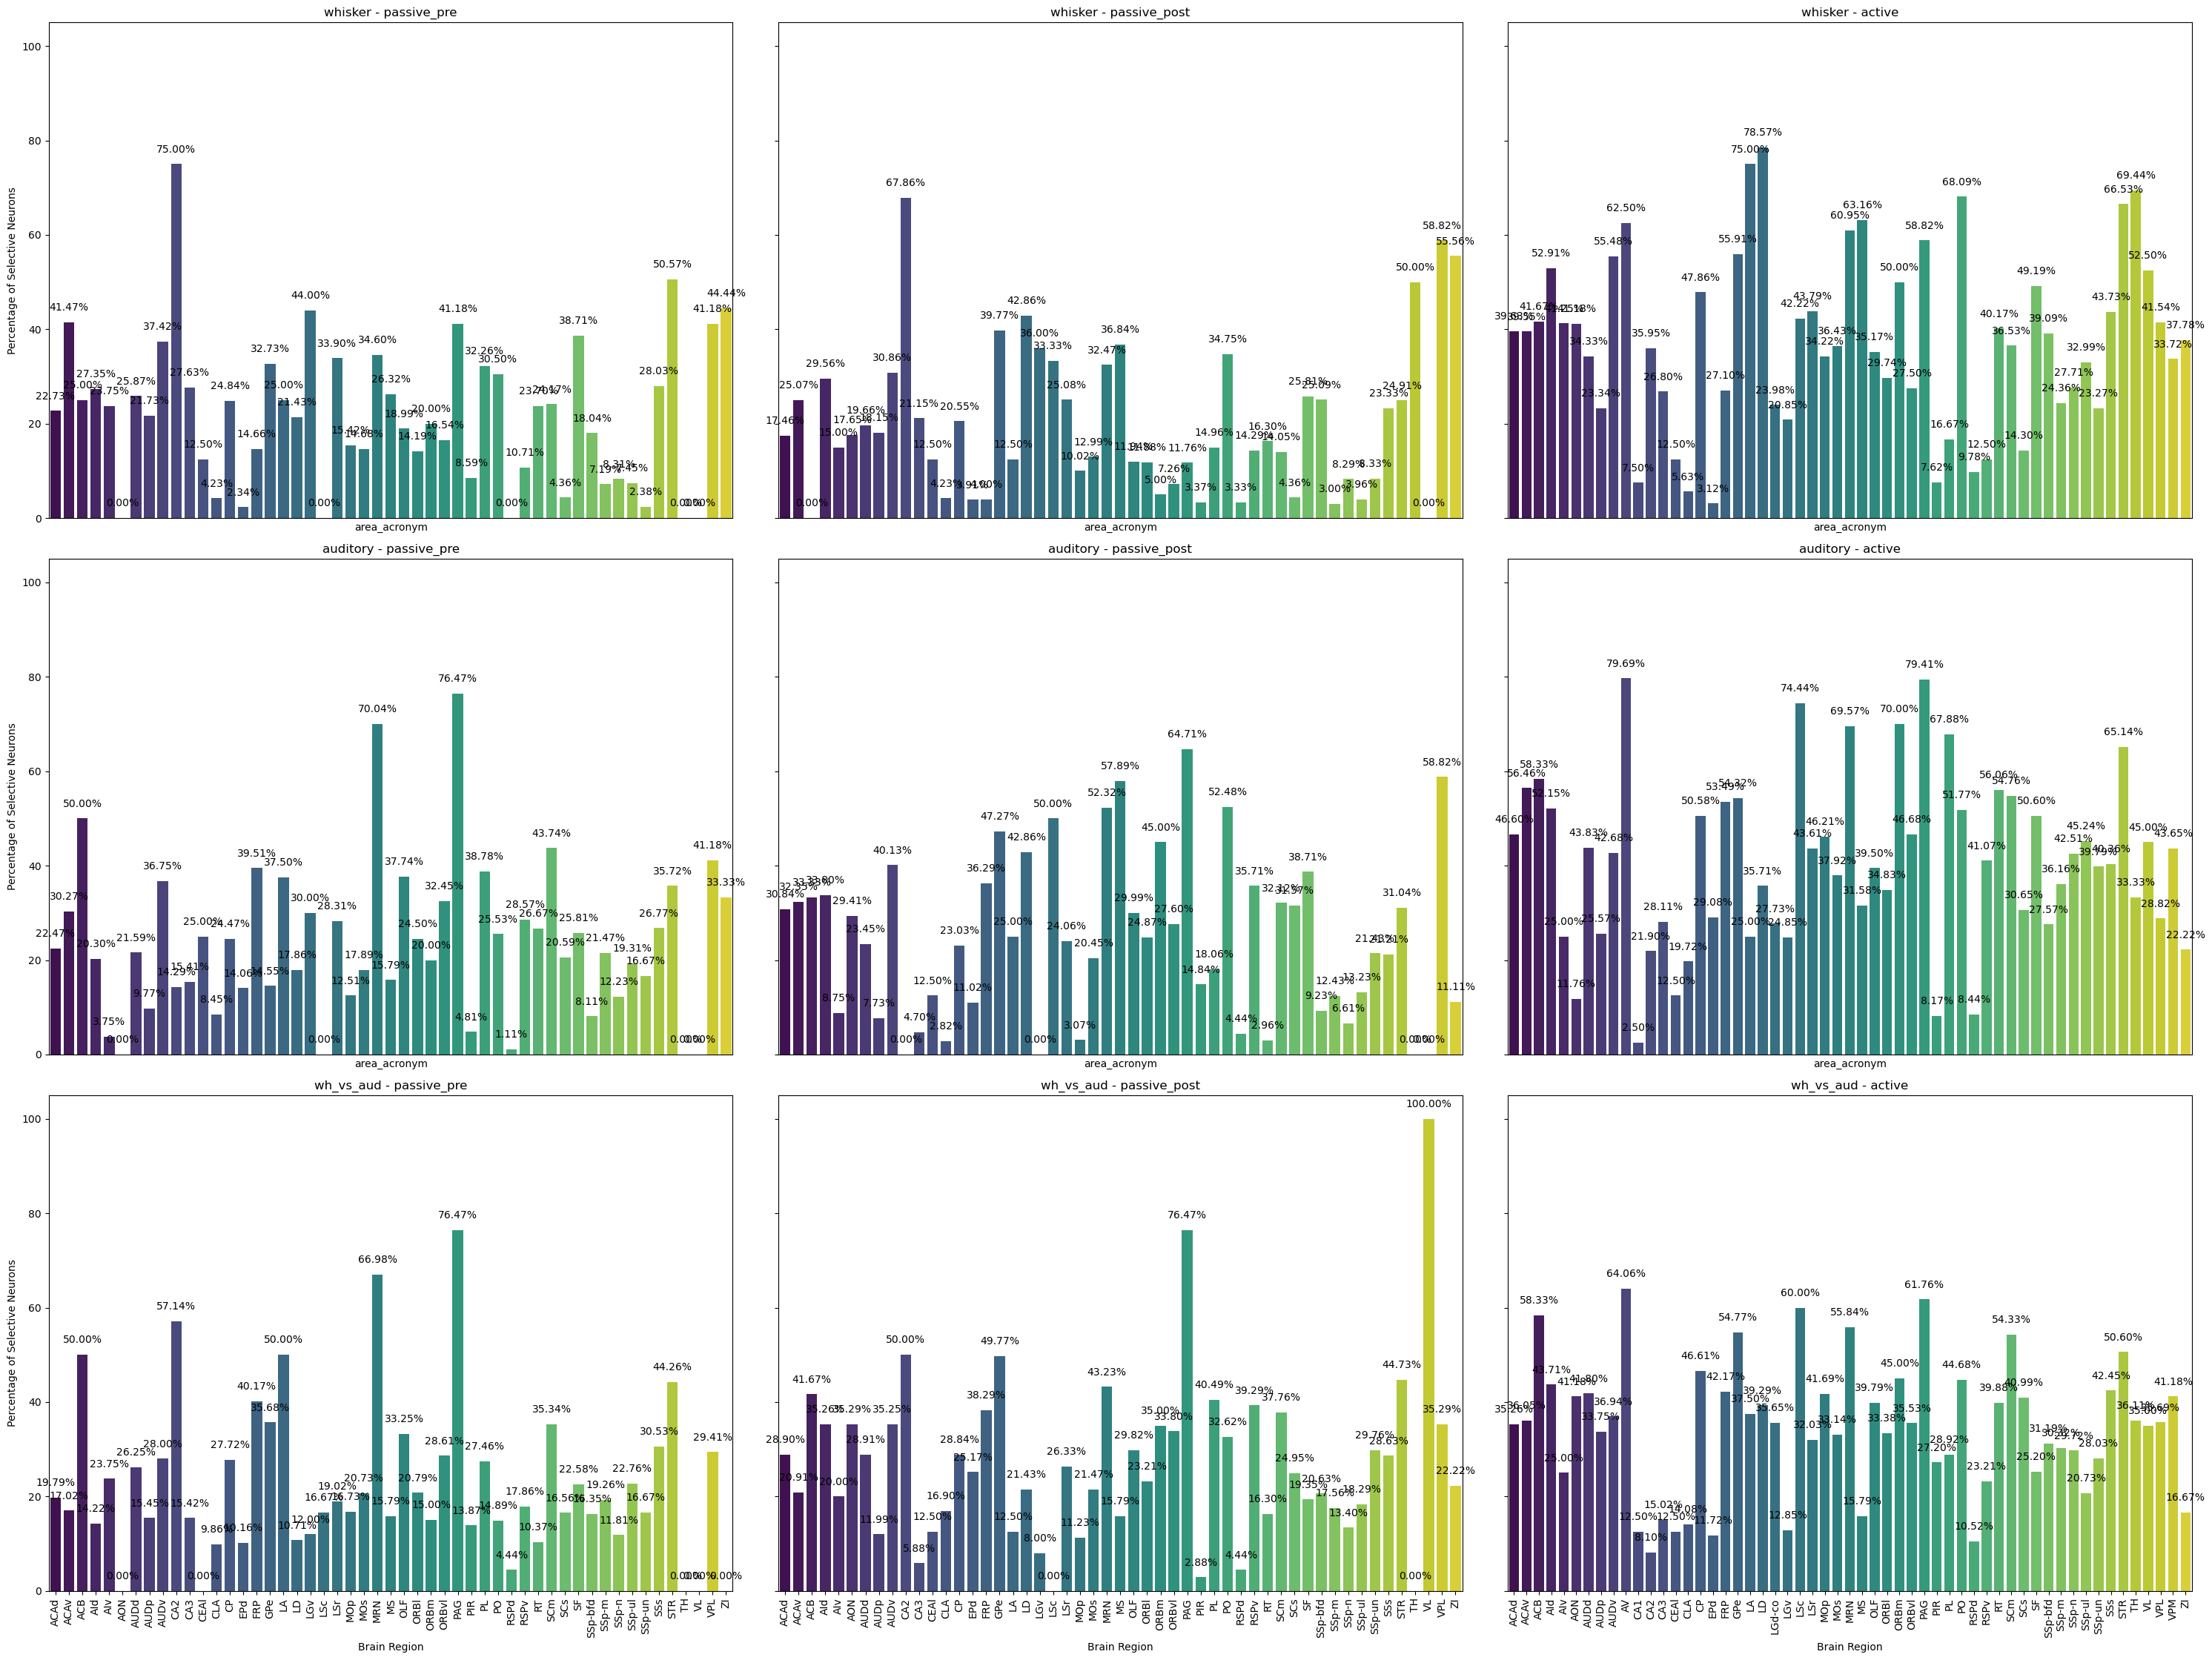

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_all_categories(df, categories, contexts, offset=2, over_mouse=True):
    """
    Generates a grid of plots where each row corresponds to a category and each column corresponds to a context.

    Parameters:
    - df: DataFrame with 'mouse_id', 'area_acronym' (brain region), 'selective', and other necessary columns.
    - categories: List of categories to plot (e.g., ['whisker', 'auditory', 'wh_vs_aud']).
    - contexts: List of contexts to plot (e.g., ['passive_pre', 'passive_post', 'active']).
    - offset: Distance for percentage annotation above the bars (default=2).
    - over_mouse: Whether to calculate percentages over individual mice (True) or overall (False).
    """
    # Set up the figure and axes grid, adjusting to group by context
    num_rows = len(categories)
    num_cols = len(contexts)
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows), sharey=True)
    axes = axes if num_rows > 1 else [axes]  # Ensure axes is always a 2D array

    for col_idx, context in enumerate(contexts):  # Iterate over contexts (columns)
        for row_idx, category in enumerate(categories):  # Iterate over categories (rows)
            ax = axes[row_idx][col_idx] if num_rows > 1 else axes[col_idx]

            # Filter data based on category and context
            if category == 'spontaneous_licks':
                df_filtered = df[df['event'] == category]
            else:
                df_filtered = df[(df['event'] == category) & (df['context'] == context)]

            # Drop NaN values and calculate percentages
            df_filtered = df_filtered.dropna(subset=['selective'])
            df_filtered['selective'] = df_filtered['selective'].astype(bool)

            if over_mouse:
                percentages = df_filtered.groupby(['area_acronym', 'mouse_id'])['selective'].mean().reset_index()
            else:
                percentages = df_filtered.groupby(['area_acronym'])['selective'].mean().reset_index()
            percentages['selective'] *= 100
            avg_percentages = percentages.groupby('area_acronym')['selective'].mean().reset_index()

            # Plot data
            sns.barplot(
                x='area_acronym', y='selective', data=avg_percentages, palette='viridis',
                ax=ax, order=avg_percentages['area_acronym'].tolist()
            )

            # Add annotations
            for i, row in avg_percentages.iterrows():
                ax.text(i, row['selective'] + offset, f"{row['selective']:.2f}%", ha='center', va='bottom', color='black')

            # Titles and labels
            ax.set_title(f"{category} - {context}")
            if row_idx == num_rows - 1:  # Only add x-axis label to bottom row
                ax.set_xlabel('Brain Region')
                ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')
            else:
                ax.set_xticks([])  # Remove x-ticks and labels for other rows

            if col_idx == 0:  # Only add y-axis label to first column
                ax.set_ylabel('Percentage of Selective Neurons')
            else:
                ax.set_ylabel('')

    # Adjust layout
    plt.tight_layout(rect=[0, 0.5, 2, 2])  # Leave space for suptitle
    plt.show()


categories = ['whisker', 'auditory', 'wh_vs_aud']
contexts = ['passive_pre', 'passive_post', 'active']
plot_all_categories(df, categories, contexts, offset=2, over_mouse=True)


In [ ]:
categories = ['whisker', 'auditory', 'wh_vs_aud']
contexts = ['passive_pre', 'passive_post', 'active']

for category in categories:
    for context in contexts:
        plot_selectivity(df, offset=2, category=category, context=context, over_mouse=True)

plot_selectivity(df, offset=2, category='spontaneous_licks', over_mouse=True)

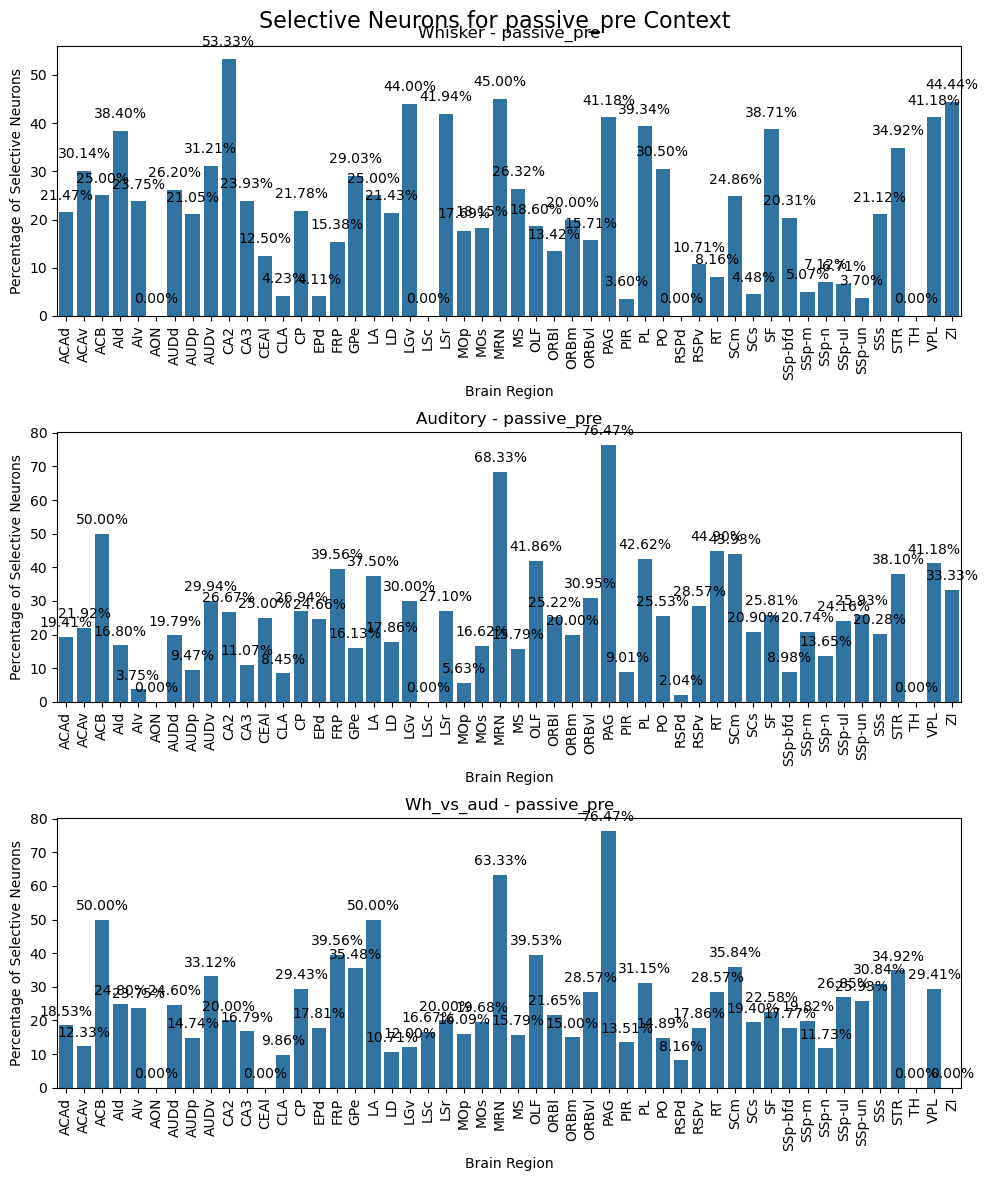

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

categories = ['whisker', 'auditory', 'wh_vs_aud']
context = 'passive_pre'  # Set your context here

def plot_selectivity(df, category='whisker', context='active', over_mouse=False):
    """
    Plots the average percentage of selective neurons per brain region for the given category and context.
    
    Parameters:
    - df: DataFrame with 'mouse_id', 'area_acronym' (brain region), and 'selective'.
    - category: Category for the event ('whisker', 'auditory', etc.)
    - context: Context for the event (e.g., 'active', 'passive_pre', etc.)
    """
    # Filter the dataframe for the given category and context
    df_filtered = df[(df['event'] == category) & (df['context'] == context)]

    # Drop NaN values in the 'selective' column
    df_filtered = df_filtered.dropna(subset=['selective'])

    # Ensure 'selective' is a binary column (True/False)
    df_filtered['selective'] = df_filtered['selective'].astype(bool)

    # Calculate the percentage of selective neurons per mouse and brain region
    if over_mouse:
        percentages = df_filtered.groupby(['area_acronym', 'mouse_id'])['selective'].mean().reset_index()
    else:
        percentages = df_filtered.groupby(['area_acronym'])['selective'].mean().reset_index()
    percentages['selective'] *= 100  # Convert to percentage

    return percentages

# Create a figure with 3 vertically stacked subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 12))  # 3 rows, 1 column

# Loop through categories and plot each one in a separate subplot
for i, category in enumerate(categories):
    ax = axs[i]  # Access the current axis for this category
    
    # Plot the data for the current category and context
    avg_percentages = plot_selectivity(df, category=category, context=context)
    
    # Create a seaborn barplot for the current category
    sns.barplot(x='area_acronym', y='selective', data=avg_percentages, ax=ax) #palette='viridis'
    
    # Set the title and labels for the current subplot
    ax.set_title(f"{category.capitalize()} - {context}")
    ax.set_xlabel('Brain Region')
    ax.set_ylabel('Percentage of Selective Neurons')
    ax.tick_params(axis='x', rotation=90)

    # Add percentage annotations
    for idx, row in avg_percentages.iterrows():
        ax.text(idx, row['selective'] + 2, f"{row['selective']:.2f}%", ha='center', va='bottom', color='black')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.suptitle(f'Selective Neurons for {context} Context', fontsize=16)
plt.subplots_adjust(top=0.95)  # Adjust the top to fit the main title
plt.show()


### Selectivity averaged over each region only

In [51]:
categories = ['whisker', 'auditory', 'wh_vs_aud']
contexts = ['passive_pre', 'passive_post', 'auditory']

for category in categories:
    for context in contexts:
        plot_selectivity(df, category=category, context=context)

#plot_selectivity(df, offset=2, category='spontaneous_licks')

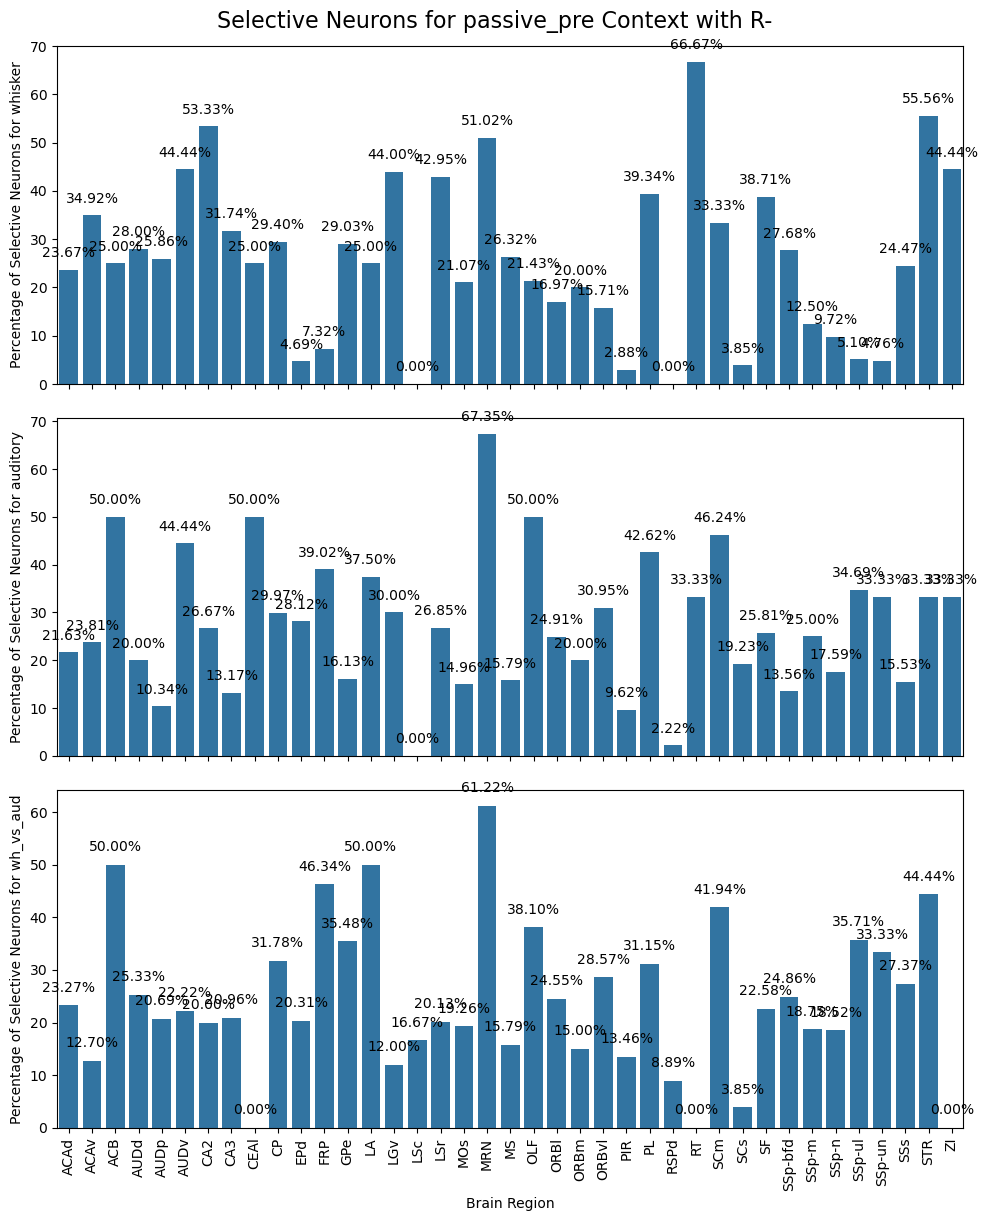

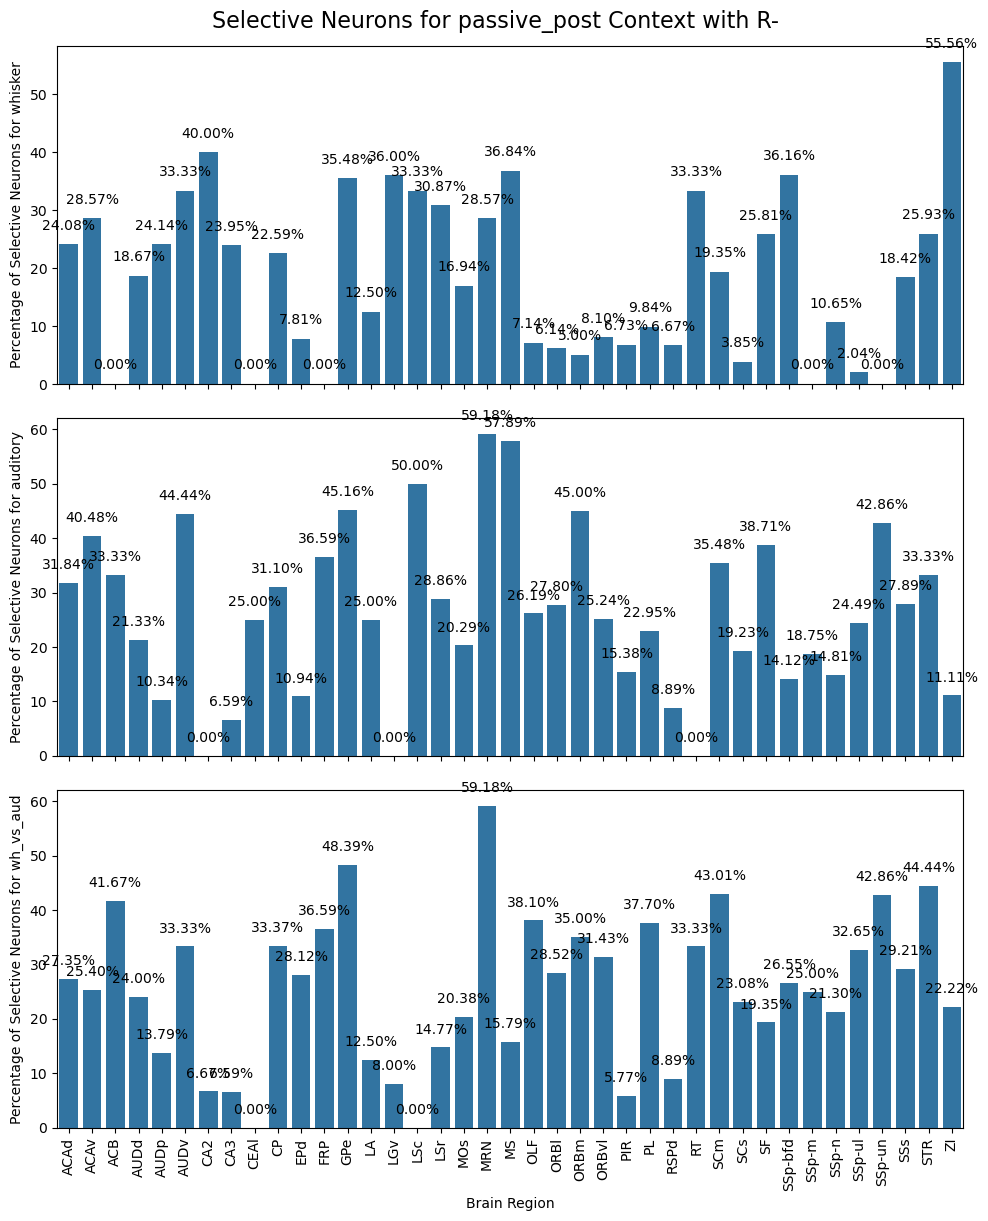

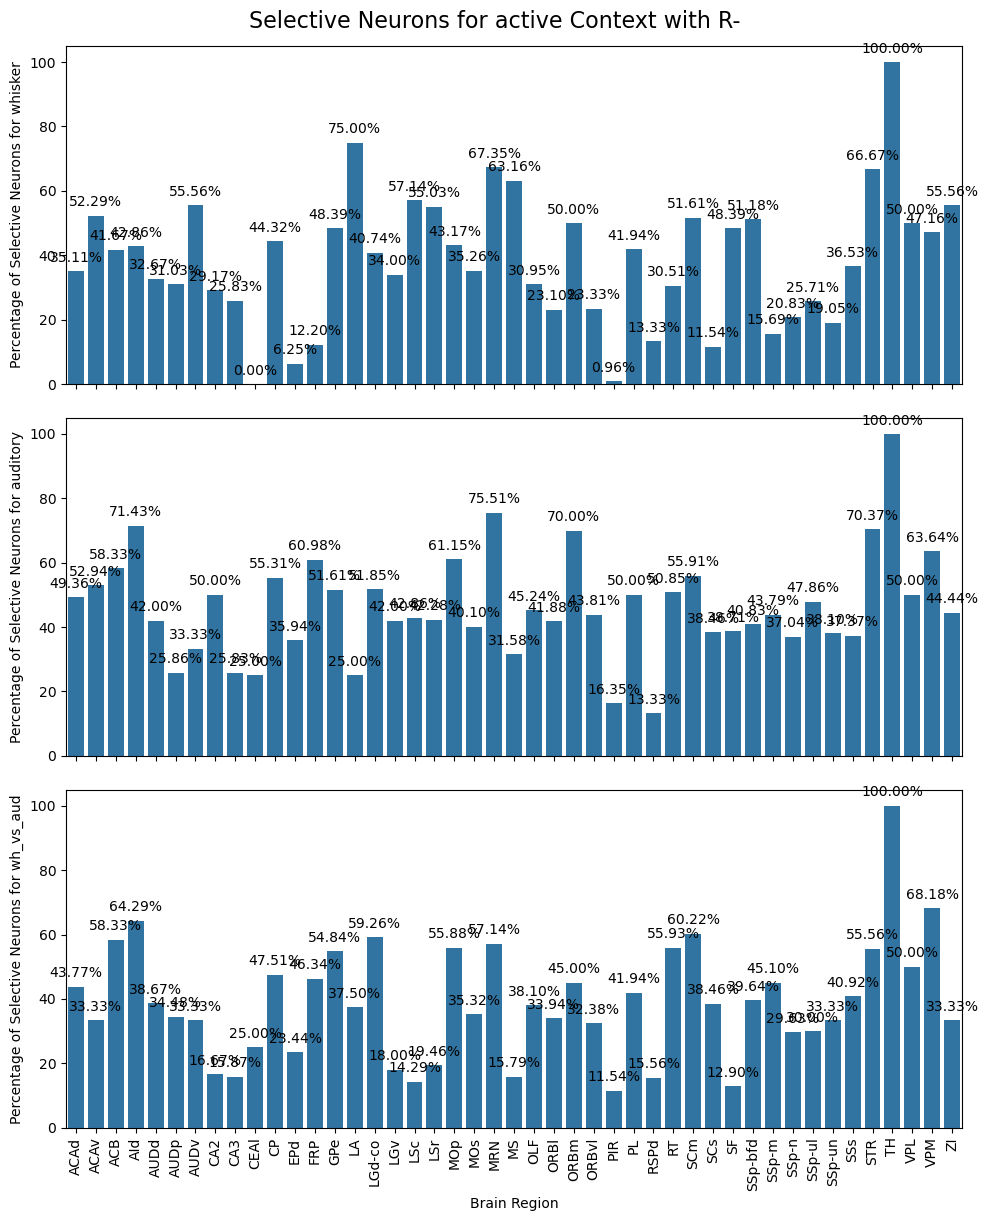

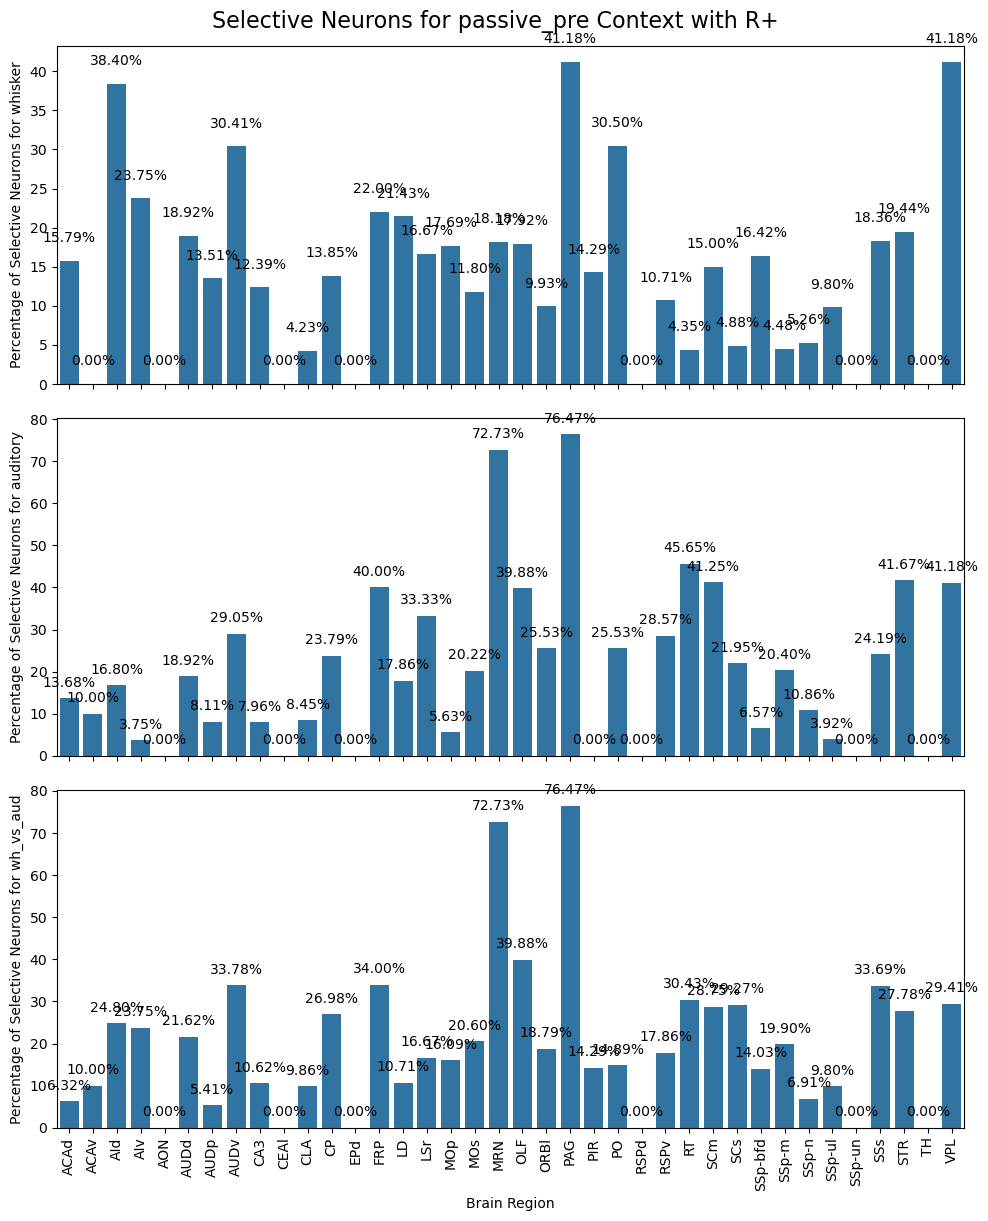

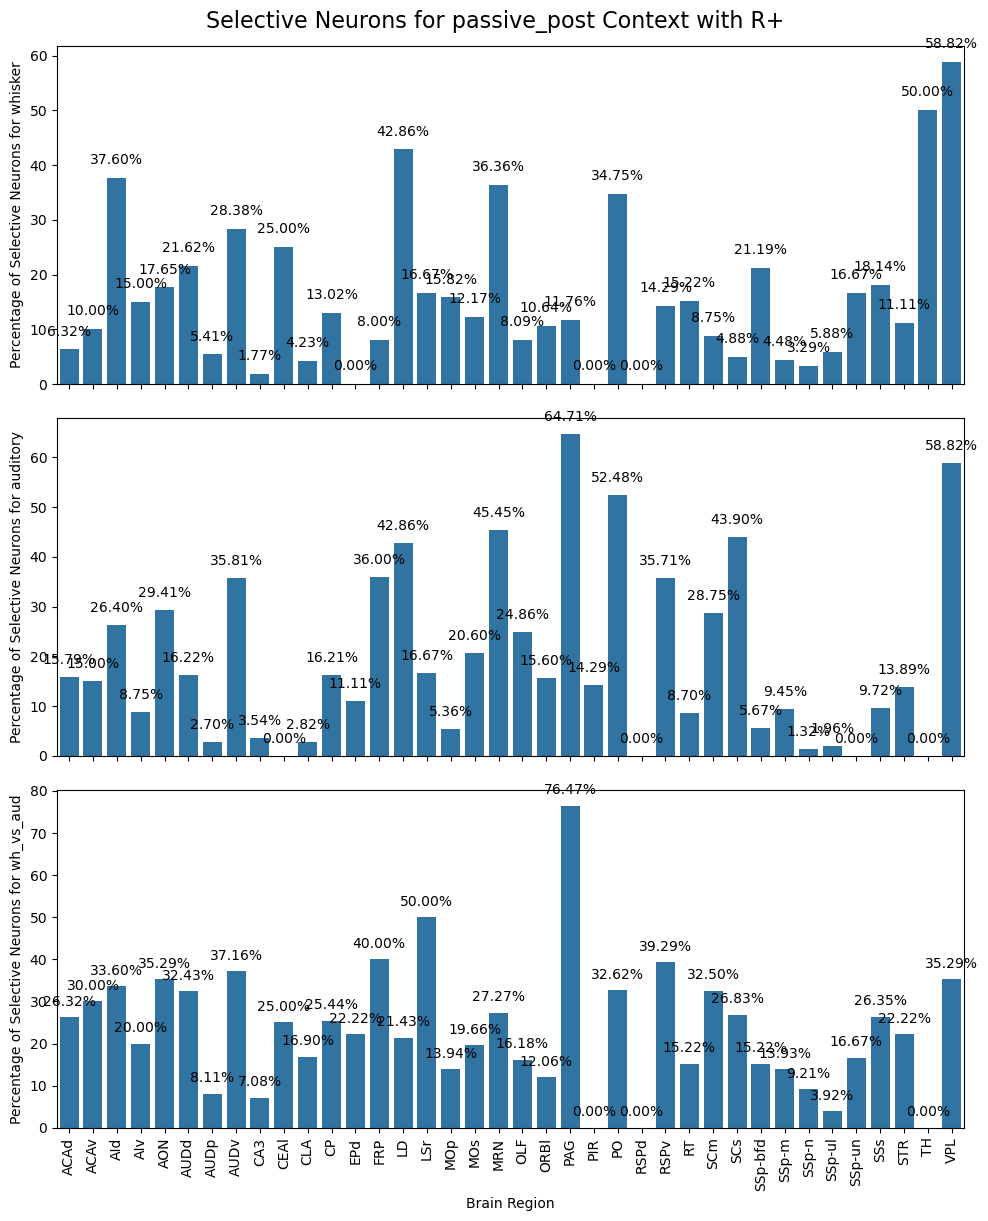

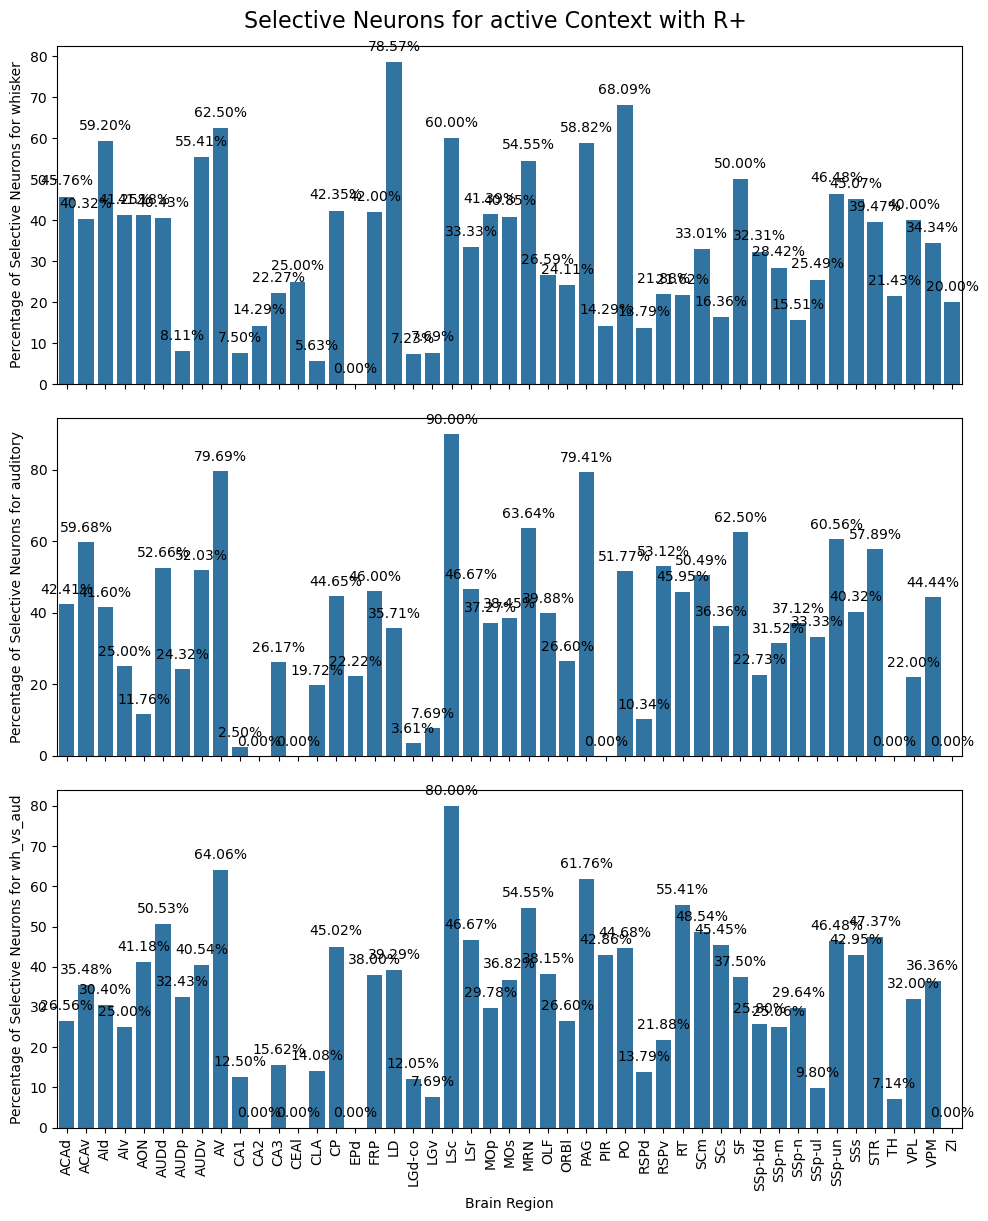

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

categories = ['whisker', 'auditory', 'wh_vs_aud']
contexts = ['passive_pre', 'passive_post', 'active']  # Set your context here
wh_rewards = ['R+', 'R-']

def percentage_selectivity(df, category='whisker', context='active', over_mouse=False, wh_reward = 'R+'):
    """
    Plots the average percentage of selective neurons per brain region for the given category and context.
    
    Parameters:
    - df: DataFrame with 'mouse_id', 'area_acronym' (brain region), and 'selective'.
    - category: Category for the event ('whisker', 'auditory', etc.)
    - context: Context for the event (e.g., 'active', 'passive_pre', etc.)
    """
    # Filter the dataframe for the given category and context
    df_filtered = df[(df['event'] == category) & (df['context'] == context) & (df['wh_reward'] == wh_reward)]

    # Drop NaN values in the 'selective' column
    df_filtered = df_filtered.dropna(subset=['selective'])

    # Ensure 'selective' is a binary column (True/False)
    df_filtered['selective'] = df_filtered['selective'].astype(bool)

    # Calculate the percentage of selective neurons per mouse and brain region
    if over_mouse:
        percentages = df_filtered.groupby(['area_acronym', 'mouse_id'])['selective'].mean().reset_index()
    else:
        percentages = df_filtered.groupby(['area_acronym'])['selective'].mean().reset_index()
    percentages['selective'] *= 100  # Convert to percentage

    return percentages


for wh_reward in ['R-', 'R+']:
    for context in contexts:
        # Create a figure with 3 vertically stacked subplots
        fig, axs = plt.subplots(3, 1, figsize=(10, 12))  # 3 rows, 1 column

        # Loop through categories and plot each one in a separate subplot
        for i, category in enumerate(categories):
            
            ax = axs[i]
            
            # Plot the data for the current category and context
            avg_percentages = percentage_selectivity(df, category=category, context=context, wh_reward = wh_reward)
            
            # Create a seaborn barplot for the current category
            sns.barplot(x='area_acronym', y='selective', data=avg_percentages, ax = ax)#, palette='viridis', ax=ax)
            
            # Remove titles for individual subplots
            ax.set_title('')
            
            # Set the y-axis label for all plots
            ax.set_ylabel(f'Percentage of Selective Neurons for {category}')
            
            # Add percentage annotations
            for idx, row in avg_percentages.iterrows():
                ax.text(idx, row['selective'] + 2, f"{row['selective']:.2f}%", ha='center', va='bottom', color='black')

            # Remove x-tick labels for the non-bottom-most plots
            if i < 2:
                ax.tick_params(axis='x', labelbottom=False)
                ax.set_xlabel('')  # Remove x-label for the top two plots
            else:
                ax.set_xlabel('Brain Region')  # Keep the x-label for the bottom-most plot
        # Adjust layout to avoid overlap
        plt.tight_layout()
        plt.suptitle(f'Selective Neurons for {context} Context with {wh_reward}', fontsize=16)
        plt.subplots_adjust(top=0.95, hspace=0.1)  # Adjust vertical space between subplots
        plt.xticks(rotation = 90)
        plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

categories = ['whisker', 'auditory', 'wh_vs_aud']
contexts = ['passive_pre', 'passive_post', 'active']  # Set your context here
wh_rewards = ['R+', 'R-']

def percentage_selectivity(df, category='whisker', context='active', over_mouse=False, wh_reward = 'R+'):
    """
    Plots the average percentage of selective neurons per brain region for the given category and context.
    
    Parameters:
    - df: DataFrame with 'mouse_id', 'area_acronym' (brain region), and 'selective'.
    - category: Category for the event ('whisker', 'auditory', etc.)
    - context: Context for the event (e.g., 'active', 'passive_pre', etc.)
    """
    # Filter the dataframe for the given category and context
    df_filtered = df[(df['event'] == category) & (df['context'] == context) & (df['wh_reward'] == wh_reward)]

    # Drop NaN values in the 'selective' column
    df_filtered = df_filtered.dropna(subset=['selective'])

    # Ensure 'selective' is a binary column (True/False)
    df_filtered['selective'] = df_filtered['selective'].astype(bool)

    # Calculate the percentage of selective neurons per mouse and brain region
    if over_mouse:
        percentages = df_filtered.groupby(['area_acronym', 'mouse_id'])['selective'].mean().reset_index()
    else:
        percentages = df_filtered.groupby(['area_acronym'])['selective'].mean().reset_index()
    percentages['selective'] *= 100  # Convert to percentage

    return percentages



for context in contexts:
    # Create a figure with 3 vertically stacked subplots
    fig, axs = plt.subplots(3, 1, figsize=(10, 12))  # 3 rows, 1 column

    # Loop through categories and plot each one in a separate subplot
    for i, category in enumerate(categories):
        for j, wh_reward in enumerate(wh_rewards):
            ax = axs[i]
            
            
            # Plot the data for the current category and context
            avg_percentages = percentage_selectivity(df, category=category, context=context, wh_reward=
                                                     wh_reward)
            
            # Create a seaborn barplot for the current category
            sns.barplot(x='area_acronym', y='selective', data=avg_percentages, palette='viridis', ax=ax)
            
            # Remove titles for individual subplots
            ax.set_title('')
            
            # Set the y-axis label for all plots
            ax.set_ylabel(f'Percentage of Selective Neurons for {category}')
            
            # Add percentage annotations
            for idx, row in avg_percentages.iterrows():
                ax.text(idx, row['selective'] + 2, f"{row['selective']:.2f}%", ha='center', va='bottom', color='black')

            # Remove x-tick labels for the non-bottom-most plots
            if i < 2:
                ax.tick_params(axis='x', labelbottom=False)
                ax.set_xlabel('')  # Remove x-label for the top two plots
            else:
                ax.set_xlabel('Brain Region')  # Keep the x-label for the bottom-most plot

            # Adjust layout to avoid overlap
            plt.tight_layout()
            plt.suptitle(f'Selective Neurons for {context} Context with {wh_reward}', fontsize=16)
            plt.subplots_adjust(top=0.95, hspace=0)  # Adjust vertical space between subplots
            plt.xticks(rotation = 90)
            plt.show()


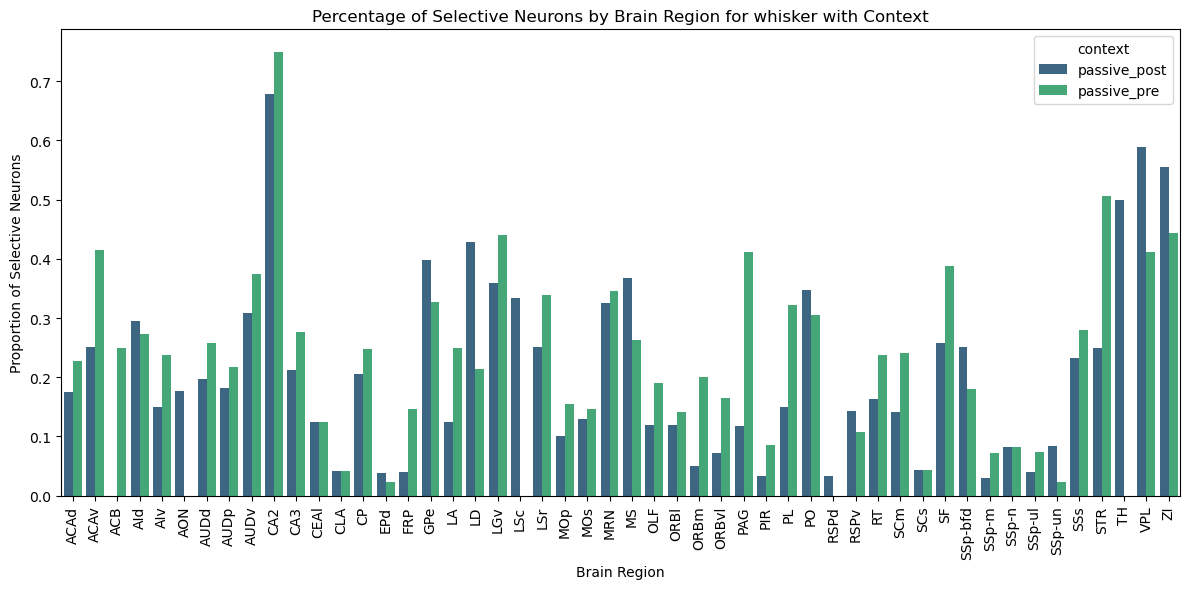

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_selectivity_by_element(df, category='whisker', element='context', has_context=0, over_mouse=False):
    """
    Plots the average selective neurons per brain region, grouped by a given element (e.g., context, category).
    
    Parameters:
    - df: DataFrame with 'mouse_id', 'area_acronym' (brain region), 'selective', and the specified element.
    - category: Filter based on category (default='whisker').
    - element: The element to group by (e.g., 'context', 'category').
    - has_context: Whether to include data with the specified context (0 or 1).
    - over_mouse: Whether to calculate percentages over individual mice (True) or overall (False).
    """

    # Filter the data based on the selected category
    if category == 'spontaneous_licks':
        df_filtered = df[(df['event'] == category)]
    else:
        df_filtered = df[(df['event'] == category)]  # Remove the fixed context filtering

    if (has_context == True) or (has_context == False):
        df_filtered = df_filtered[df_filtered['has context'] == has_context]
    
    # Drop NaN values in 'selective' column
    df_filtered = df_filtered.dropna(subset=['selective'])

    # Ensure 'selective' is a binary column (True/False)
    df_filtered['selective'] = df_filtered['selective'].astype(bool)
    df_filtered = df_filtered[df_filtered[element]!='active']
    # Calculate the mean of selective neurons per mouse and brain region
    if over_mouse:
        percentages = df_filtered.groupby(['area_acronym', 'mouse_id', element])['selective'].mean().reset_index()
    else:
        percentages = df_filtered.groupby(['area_acronym', element])['selective'].mean().reset_index()
    
    

    # Average percentages across mice for each brain region and element
    avg_percentages = percentages.groupby(['area_acronym', element])['selective'].mean().reset_index()

    # Get the unique order of brain regions and elements (dynamic grouping)
    category_order = avg_percentages['area_acronym'].unique().tolist()
    element_order = avg_percentages[element].unique().tolist()

    # Create the bar plot with explicit order
    plt.figure(figsize=(12, 6))  # Set figure size
    ax = sns.barplot(x='area_acronym', y='selective', hue=element, data=avg_percentages, palette='viridis', 
                     order=category_order, hue_order=element_order)
    # Title and labels
    title = (f"Percentage of Selective Neurons by Brain Region for {category}"
             if category == 'spontaneous_licks' else
             f"Percentage of Selective Neurons by Brain Region for {category} with {element.capitalize()}")
    plt.title(title)
    plt.xlabel('Brain Region')
    plt.ylabel('Proportion of Selective Neurons')
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90, ha='center')
    # Tight layout
    plt.tight_layout()
    # Show the plot
    plt.show()


# Example usage:
# Assuming you have a DataFrame `df` with the necessary columns
plot_selectivity_by_element(df, category='whisker', element='context', has_context=0, over_mouse=True)


/var/folders/p6/m1p5k4zj0yn9mk66d_dh7pn40000gn/T/ipykernel_60579/2986639918.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')
/var/folders/p6/m1p5k4zj0yn9mk66d_dh7pn40000gn/T/ipykernel_60579/2986639918.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')


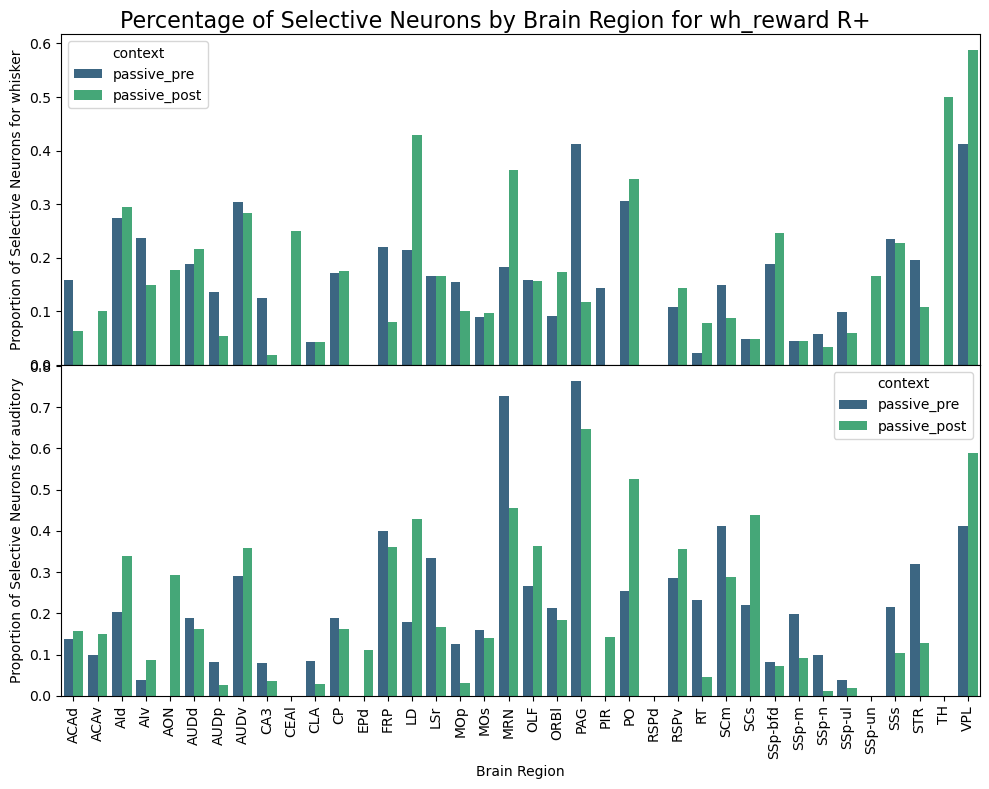

/var/folders/p6/m1p5k4zj0yn9mk66d_dh7pn40000gn/T/ipykernel_60579/2986639918.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')
/var/folders/p6/m1p5k4zj0yn9mk66d_dh7pn40000gn/T/ipykernel_60579/2986639918.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')


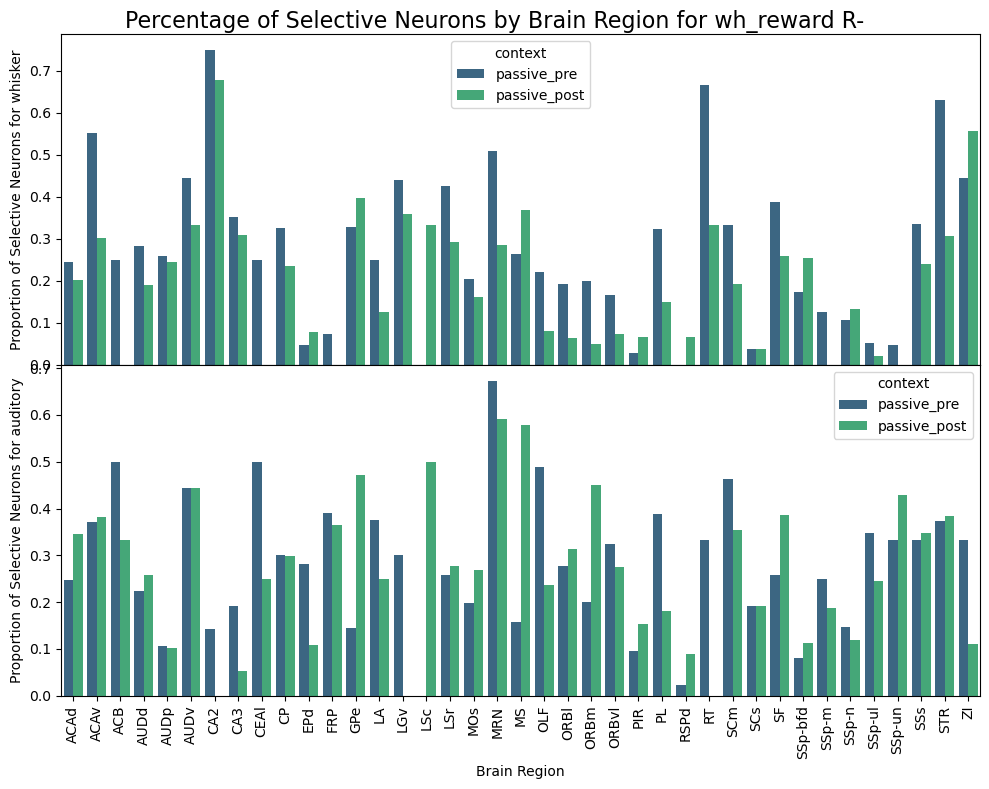

/var/folders/p6/m1p5k4zj0yn9mk66d_dh7pn40000gn/T/ipykernel_60579/2986639918.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')
/var/folders/p6/m1p5k4zj0yn9mk66d_dh7pn40000gn/T/ipykernel_60579/2986639918.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')


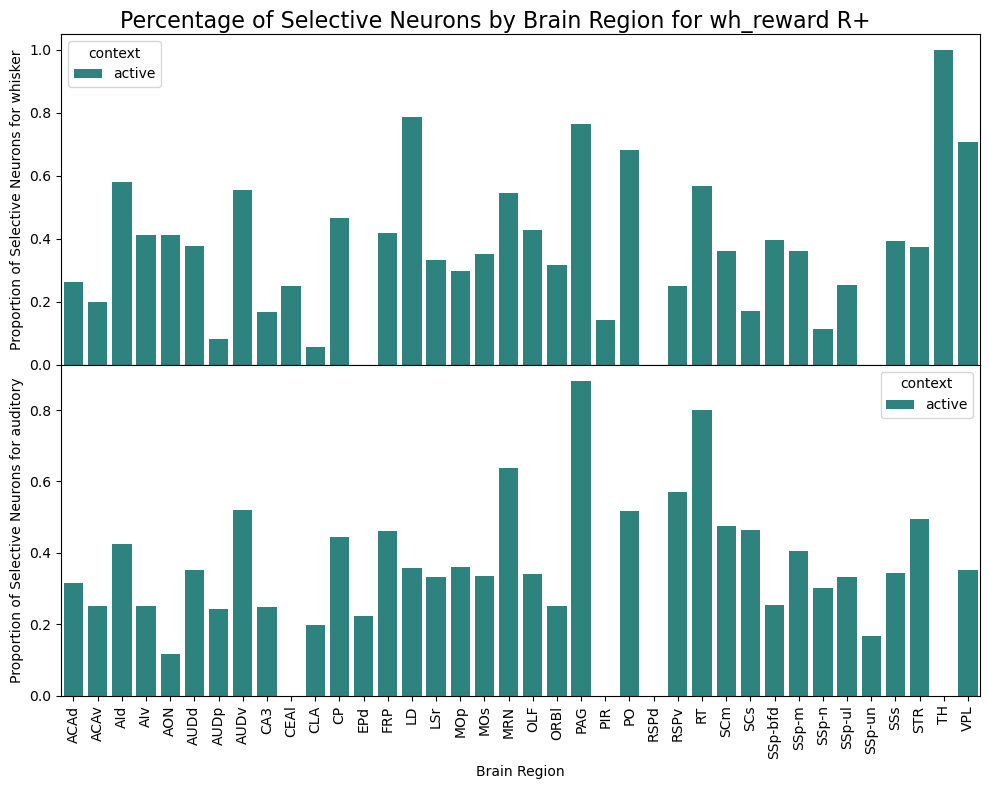

/var/folders/p6/m1p5k4zj0yn9mk66d_dh7pn40000gn/T/ipykernel_60579/2986639918.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')
/var/folders/p6/m1p5k4zj0yn9mk66d_dh7pn40000gn/T/ipykernel_60579/2986639918.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')


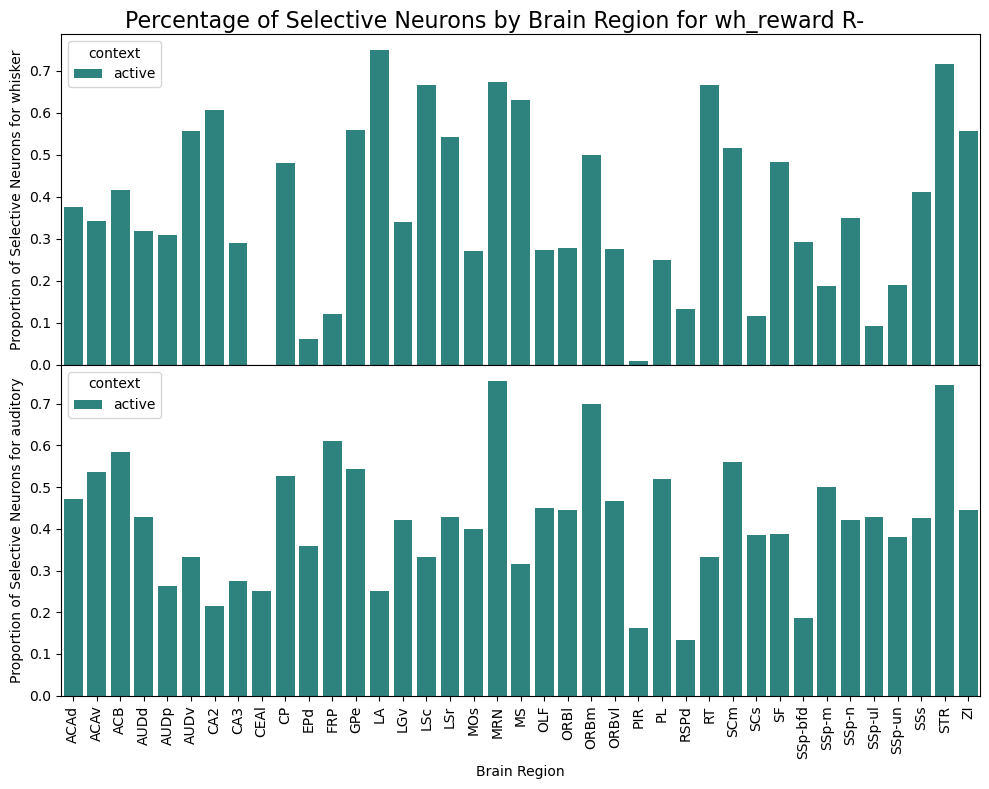

/var/folders/p6/m1p5k4zj0yn9mk66d_dh7pn40000gn/T/ipykernel_60579/2986639918.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')
/var/folders/p6/m1p5k4zj0yn9mk66d_dh7pn40000gn/T/ipykernel_60579/2986639918.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')


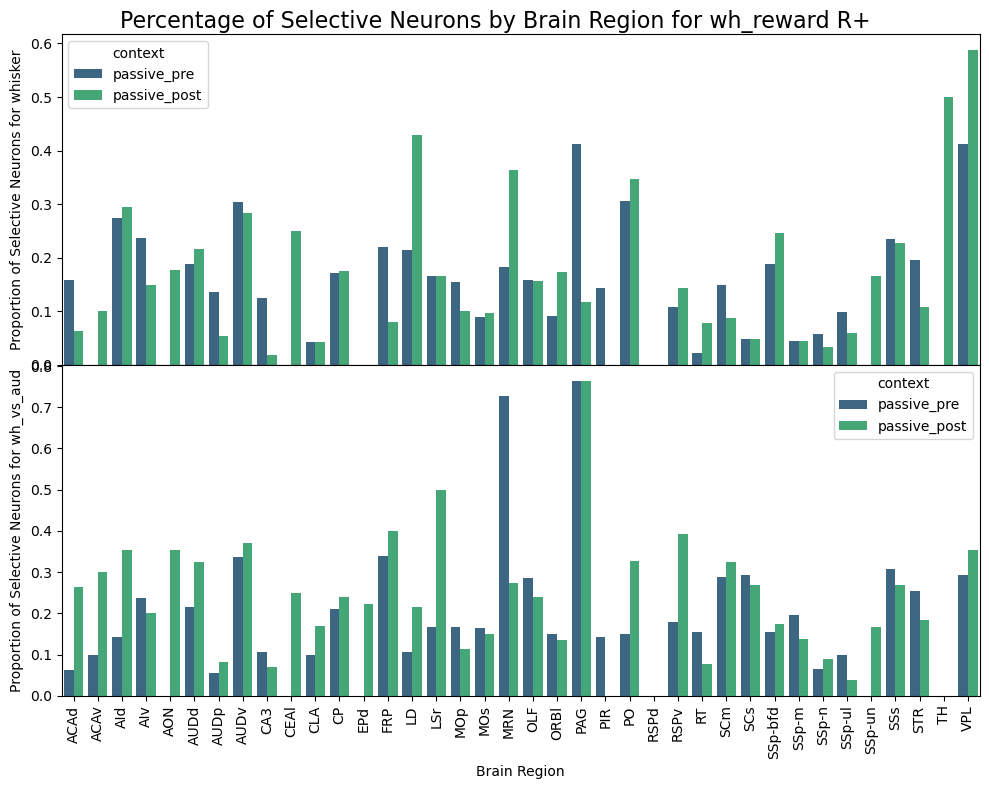

/var/folders/p6/m1p5k4zj0yn9mk66d_dh7pn40000gn/T/ipykernel_60579/2986639918.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')
/var/folders/p6/m1p5k4zj0yn9mk66d_dh7pn40000gn/T/ipykernel_60579/2986639918.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')


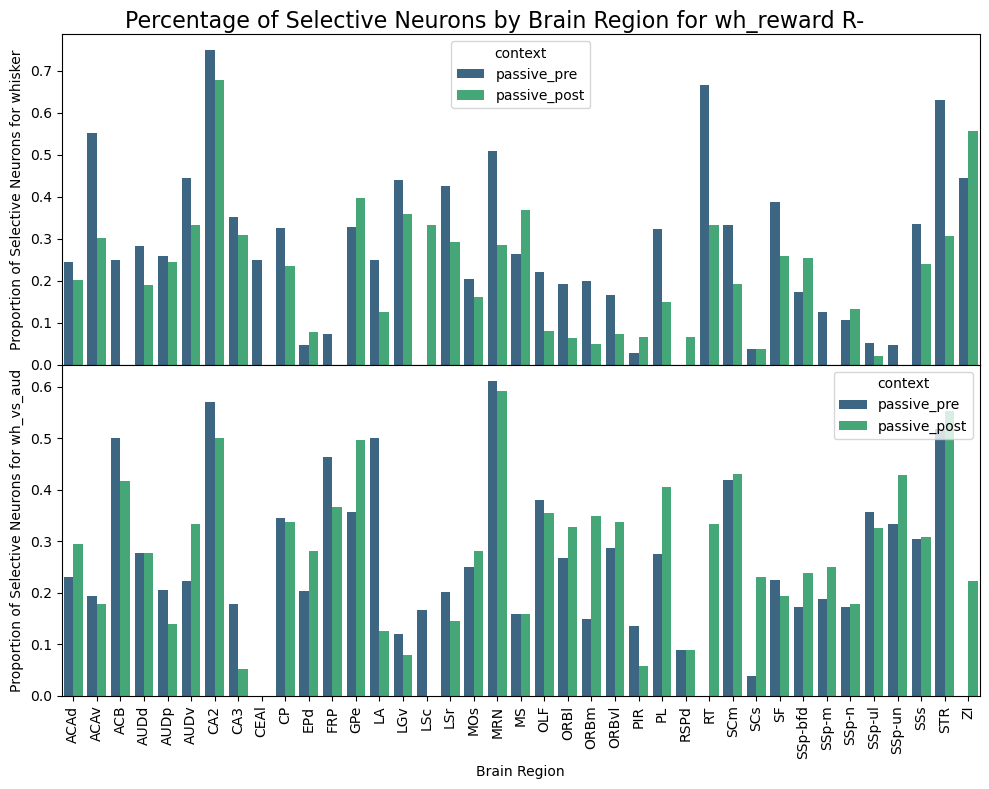

/var/folders/p6/m1p5k4zj0yn9mk66d_dh7pn40000gn/T/ipykernel_60579/2986639918.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')
/var/folders/p6/m1p5k4zj0yn9mk66d_dh7pn40000gn/T/ipykernel_60579/2986639918.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')


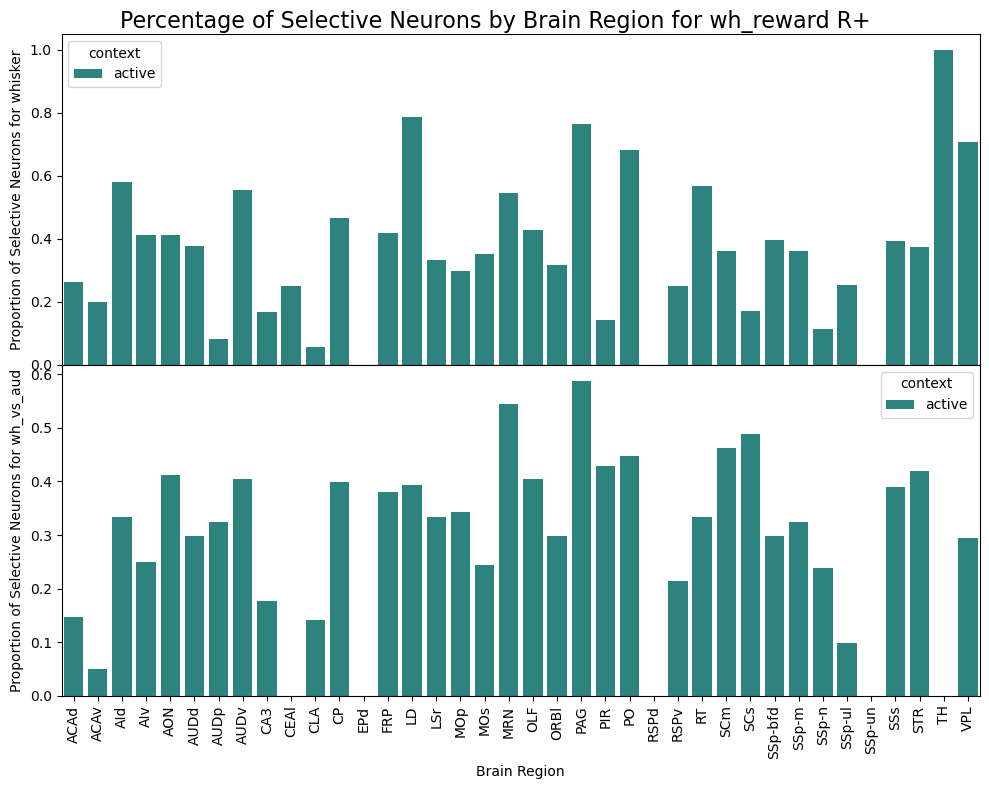

/var/folders/p6/m1p5k4zj0yn9mk66d_dh7pn40000gn/T/ipykernel_60579/2986639918.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')
/var/folders/p6/m1p5k4zj0yn9mk66d_dh7pn40000gn/T/ipykernel_60579/2986639918.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')


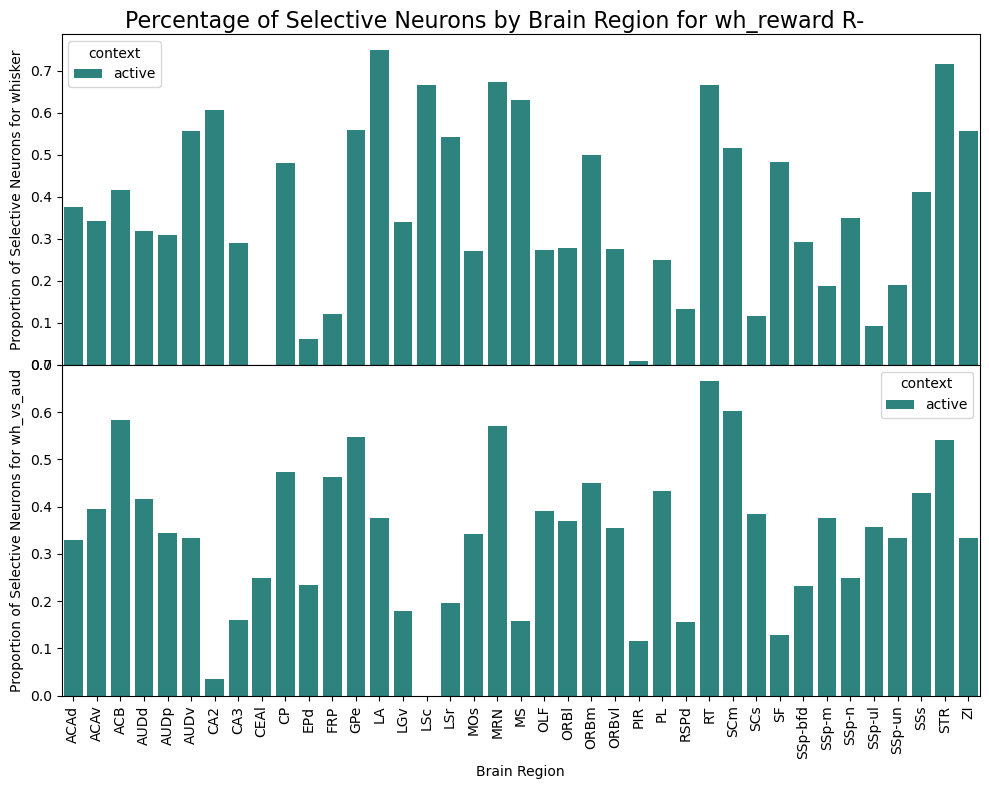

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_selectivity_by_element(df, categories=['whisker', 'auditory', 'wh_vs_aud'], element='context', wh_reward = 'R+', has_context=0, over_mouse=False, element_order = ['passive_pre', 'passive_post', 'active']):
    """
    Plots the average selective neurons per brain region for multiple categories, stacked vertically.
    
    Parameters:
    - df: DataFrame with 'mouse_id', 'area_acronym' (brain region), 'selective', and the specified element.
    - categories: List of categories to plot (default=['whisker', 'auditory', 'wh_vs_aud']).
    - element: The element to group by (e.g., 'context', 'category').
    - has_context: Whether to include data with the specified context (0 or 1).
    - over_mouse: Whether to calculate percentages over individual mice (True) or overall (False).
    """
    # Create a figure with 3 vertically stacked subplots
    fig, axs = plt.subplots(len(categories), 1, figsize=(10, 8))  # 3 rows, 1 column
    # Loop through categories and plot each one in a separate subplot
    for i, category in enumerate(categories):
        ax = axs[i]  # Access the current axis for this category

        # Filter the data based on the selected category
        if category == 'spontaneous_licks':
            df_filtered = df[(df['event'] == category)]
        else:
            df_filtered = df[(df['event'] == category)]  # Remove the fixed context filtering

        if (has_context == True) or (has_context == False):
            df_filtered = df_filtered[df_filtered['has context'] == has_context]

        # Drop NaN values in 'selective' column
        df_filtered = df_filtered.dropna(subset=['selective'])

        # Ensure 'selective' is a binary column (True/False)
        df_filtered['selective'] = df_filtered['selective'].astype(bool)
        df_filtered = df_filtered[df_filtered['wh_reward']==wh_reward]

        # Calculate the mean of selective neurons per mouse and brain region
        if over_mouse:
            percentages = df_filtered.groupby(['area_acronym', 'mouse_id', element])['selective'].mean().reset_index()
        else:
            percentages = df_filtered.groupby(['area_acronym', element])['selective'].mean().reset_index()

        # Average percentages across mice for each brain region and element
        avg_percentages = percentages.groupby(['area_acronym', element])['selective'].mean().reset_index()

        # Get the unique order of brain regions and elements (dynamic grouping)
        category_order = avg_percentages['area_acronym'].unique().tolist()

        # Handle the order of contexts (e.g., 'passive_pre' before 'passive_post')
        if element == 'context':
            element_order = element_order#['passive_pre', 'passive_post', 'active']  # Specify the desired order for context
        else:
            element_order = avg_percentages[element].unique().tolist()

        # Create the bar plot with explicit order
        sns.barplot(x='area_acronym', y='selective', hue=element, data=avg_percentages, palette='viridis', 
                    order=category_order, hue_order=element_order, ax=ax)

        # Title for each subplot (no subtitles, just one main title)
        #ax.set_title("Percentage of Selective Neurons by Brain Region for wh_reward")

        # Remove x-label and brain region names on all but the last subplot
        if i < len(categories) - 1:
            ax.set_xlabel('')
            ax.set_xticklabels([])  # Remove brain region names from x-axis
        else:
            ax.set_xlabel('Brain Region')

        ax.set_ylabel(f'Proportion of Selective Neurons for {category}')

        # Rotate x-axis labels for better readability
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')

    # Adjust layout to avoid overlap
    plt.tight_layout()
    plt.subplots_adjust(top=0.95, hspace=0)  # Adjust vertical space between subplots

    # Show the plot
    plt.suptitle(f"Percentage of Selective Neurons by Brain Region for wh_reward {wh_reward}", fontsize=16)  # Main title for the whole plot
    plt.show()

# Example usage:
# Assuming you have a DataFrame `df` with the necessary columns
for element_order in [['passive_pre', 'passive_post'], ['active']]:
    for wh_reward in ['R+', 'R-']:  
        plot_selectivity_by_element(df, categories=['whisker', 'auditory'], element='context', wh_reward = wh_reward, has_context=0, over_mouse=True, element_order=element_order)

for element_order in [['passive_pre', 'passive_post'], ['active']]:
    for wh_reward in ['R+', 'R-']:  
        plot_selectivity_by_element(df, categories=['whisker','wh_vs_aud'], element='context', wh_reward = wh_reward, has_context=0, over_mouse=True, element_order=element_order)


In [52]:
df[(df['context'] == 'passive_pre') & (df['event'] == 'whisker')]

cluster_id ccf_acronym                       ccf_name  ccf_parent_id  \
259             1         CA3                      Field CA3          375.0   
260             5         CA3                      Field CA3          375.0   
261             9         CA3                      Field CA3          375.0   
262            12         CA3                      Field CA3          375.0   
263            14         CA3                      Field CA3          375.0   
...           ...         ...                            ...            ...   
94113         610        MOs5  Secondary motor area, layer 5          993.0   
94114         611        MOs5  Secondary motor area, layer 5          993.0   
94115         619        MOs5  Secondary motor area, layer 5          993.0   
94116         620        MOs5  Secondary motor area, layer 5          993.0   
94117         621        MOs5  Secondary motor area, layer 5          993.0   

      ccf_parent_acronym       ccf_parent_name  \
259                   CA          Ammon's horn   
260                   CA          Ammon's horn   
261                   CA          Ammon's horn   
262                   CA          Ammon's horn   
263                   CA          Ammon's horn   
...                  ...                   ...   
94113                MOs  Secondary motor area   
94114                MOs  Secondary motor area   
94115                MOs  Secondary motor area   
94116                MOs  Secondary motor area   
94117                MOs  Secondary motor area   

                                             spike_times  \
259    [1.10997831e-02 3.79359254e-01 4.41958031e-01 ...   
260    [8.50683378e-01 8.61316503e-01 8.73749594e-01 ...   
261    [8.57983235e-02 1.90962935e-01 2.93227604e-01 ...   
262    [8.19650651e-02 1.73179949e+00 2.62854864e+00 ...   
263    [4.24688368e+00 5.92881749e+00 6.04198194e+00 ...   
...                                                  ...   
94113  [1.67906889e+00 6.87577335e+00 8.72533789e+00 ...   
94114  [ 550.09230156  556.8284405   558.09501707 ......   
94115  [5.71822129e-01 4.05309287e+00 4.42672106e+00 ...   
94116  [ 538.99870828  559.2576304   605.60872567 ......   
94117  [1647.86970883 1946.42382134 1960.57315656 196...   

                    mouse_id      context    event  ... Transformed AUC  \
259    AB120_20240811_143102  passive_pre  whisker  ...        0.114714   
260    AB120_20240811_143102  passive_pre  whisker  ...        0.088271   
261    AB120_20240811_143102  passive_pre  whisker  ...        0.060016   
262    AB120_20240811_143102  passive_pre  whisker  ...        0.014756   
263    AB120_20240811_143102  passive_pre  whisker  ...        0.081816   
...                      ...          ...      ...  ...             ...   
94113  AB116_20240724_102941  passive_pre  whisker  ...        0.044259   
94114  AB116_20240724_102941  passive_pre  whisker  ...       -0.021489   
94115  AB116_20240724_102941  passive_pre  whisker  ...       -0.082144   
94116  AB116_20240724_102941  passive_pre  whisker  ...       -0.017370   
94117  AB116_20240724_102941  passive_pre  whisker  ...       -0.012407   

      p-values positive  p-values negative  selective  direction  pre_time  \
259               0.992              0.008       True   negative       0.2   
260               0.967              0.034       True   negative       0.2   
261               1.000              0.000       True   negative       0.2   
262               0.320              0.693      False       none       0.2   
263               0.773              0.763      False       none       0.2   
...                 ...                ...        ...        ...       ...   
94113             0.966              0.051      False       none       0.2   
94114             1.000              1.000      False       none       0.2   
94115             0.175              0.944      False       none       0.2   
94116             1.000              1.000      False  

/var/folders/p6/m1p5k4zj0yn9mk66d_dh7pn40000gn/T/ipykernel_56548/2040966443.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='area_acronym', y='selective', data=avg_percentages, palette='viridis', ax=ax)
/var/folders/p6/m1p5k4zj0yn9mk66d_dh7pn40000gn/T/ipykernel_56548/2040966443.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='area_acronym', y='selective', data=avg_percentages, palette='viridis', ax=ax)
/var/folders/p6/m1p5k4zj0yn9mk66d_dh7pn40000gn/T/ipykernel_56548/2040966443.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplo

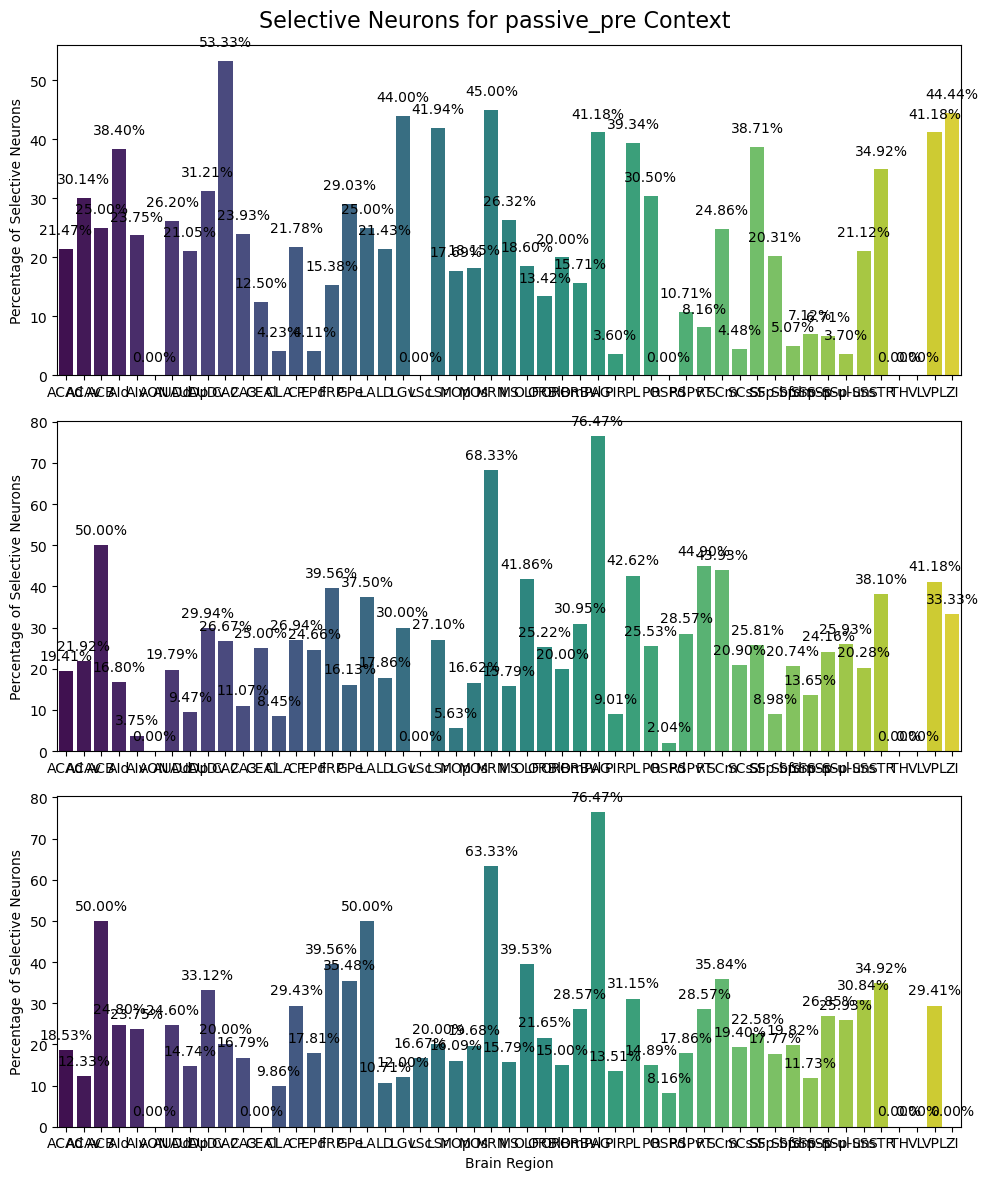

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

categories = ['whisker', 'auditory', 'wh_vs_aud']
context = 'passive_pre'  # Set your context here

def plot_selectivity(df, category='whisker', context='active', over_mouse=False):
    """
    Plots the average percentage of selective neurons per brain region for the given category and context.
    
    Parameters:
    - df: DataFrame with 'mouse_id', 'area_acronym' (brain region), and 'selective'.
    - category: Category for the event ('whisker', 'auditory', etc.)
    - context: Context for the event (e.g., 'active', 'passive_pre', etc.)
    """
    # Filter the dataframe for the given category and context
    df_filtered = df[(df['event'] == category) & (df['context'] == context)]

    # Drop NaN values in the 'selective' column
    df_filtered = df_filtered.dropna(subset=['selective'])

    # Ensure 'selective' is a binary column (True/False)
    df_filtered['selective'] = df_filtered['selective'].astype(bool)

    # Calculate the percentage of selective neurons per mouse and brain region
    if over_mouse:
        percentages = df_filtered.groupby(['area_acronym', 'mouse_id'])['selective'].mean().reset_index()
    else:
        percentages = df_filtered.groupby(['area_acronym'])['selective'].mean().reset_index()
    percentages['selective'] *= 100  # Convert to percentage

    return percentages

# Create a figure with 3 vertically stacked subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 12))  # 3 rows, 1 column

# Loop through categories and plot each one in a separate subplot
for i, category in enumerate(categories):
    ax = axs[i]  # Access the current axis for this category
    
    # Plot the data for the current category and context
    avg_percentages = plot_selectivity(df, category=category, context=context)
    
    # Create a seaborn barplot for the current category
    sns.barplot(x='area_acronym', y='selective', data=avg_percentages, palette='viridis', ax=ax)
    
    # Remove titles for individual subplots
    ax.set_title('')
    
    # Set the x-axis label and y-axis label for the bottom-most plot
    if i == 2:  # For the bottom-most plot
        ax.set_xlabel('Brain Region')
    else:
        ax.set_xlabel('')  # Remove x-axis label for the other plots
    
    # Remove x-tick labels for the non-bottom-most plots
    if i < 2:
        ax.tick_params(axis='x', labelleft=False)
    
    ax.set_ylabel('Percentage of Selective Neurons')
    
    # Add percentage annotations
    for idx, row in avg_percentages.iterrows():
        ax.text(idx, row['selective'] + 2, f"{row['selective']:.2f}%", ha='center', va='bottom', color='black')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.suptitle(f'Selective Neurons for {context} Context', fontsize=16)
plt.subplots_adjust(top=0.95)  # Adjust the top to fit the main title
plt.show()


#### Selective neurons per mouse :

In [68]:
def plot_selectivity_direction_event(df, mouse_id=''):

    # If filtering by mouse_id, only take rows corresponding to the given mouse_id
    if mouse_id != '':
        df = df[df['mouse_id'] == mouse_id]

    # Group by event and direction to calculate counts
    selective_counts = df.groupby(['event', 'direction']).size().reset_index(name='count')

    # Total counts for normalization purposes
    total_counts = selective_counts.groupby('event')['count'].sum().reset_index(name='total')

    # Merge to compute percentage of selectivity per event
    selective_percentages = selective_counts.merge(total_counts, on='event')
    selective_percentages['percentage'] = (selective_percentages['count'] / selective_percentages['total']) * 100

    # Adjust visualization values:
    # - Keep positive responses as-is
    # - For negative responses, map their magnitude to "below the baseline"
    selective_percentages['visual_percentage'] = selective_percentages.apply(
        lambda row: -row['percentage'] if row['direction'] == 'negative' else row['percentage'],
        axis=1
    )

    # Plotting
    plt.figure(figsize=(15, 8))

    # Create the bar plot with seaborn
    ax = sns.barplot(
        data=selective_percentages,
        x='event',
        y='visual_percentage',
        hue='direction',
        dodge=True,
        palette='viridis'
    )

    # Annotate the bars
    for p in ax.patches:
        percentage = f"{abs(p.get_height()):.1f}%"  # Always annotate using magnitude
        ax.annotate(
            percentage,
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center',
            va='bottom',
            fontsize=9,
            color='black',
            xytext=(0, 5),
            textcoords='offset points'
        )

    # Adjust legends to avoid duplicates
    handles, labels = ax.get_legend_handles_labels()
    unique_labels = dict(zip(labels, handles))
    ax.legend(unique_labels.values(), unique_labels.keys(), title='Direction')

    # Set axis labels and titles
    if mouse_id != '':
        title = f'Percentage of Selective Neurons per Event for Mouse {mouse_id}'
    else:
        title = 'Percentage of Selective Neurons per Event'

    plt.axhline(0, color='black', linewidth=0.8)  # Reference line at baseline
    plt.title(title)
    plt.ylabel('Percentage (%)')
    plt.xlabel('Event')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [74]:
def plot_selectivity_direction_area(df, event=''):

    # If filtering by event, only take rows corresponding to the given event
    if event != '':
        df = df[df['event'] == event]

    # Group by area_acronym and direction to calculate counts
    selective_counts = df.groupby(['area_acronym', 'direction']).size().reset_index(name='count')

    # Total counts for normalization purposes
    total_counts = selective_counts.groupby('area_acronym')['count'].sum().reset_index(name='total')

    # Merge to compute percentage of selectivity per area_acronym
    selective_percentages = selective_counts.merge(total_counts, on='area_acronym')
    selective_percentages['percentage'] = (selective_percentages['count'] / selective_percentages['total']) * 100

    # Adjust visualization values:
    # - Keep positive responses as-is
    # - For negative responses, map their magnitude to "below the baseline"
    selective_percentages['visual_percentage'] = selective_percentages.apply(
        lambda row: -row['percentage'] if row['direction'] == 'negative' else row['percentage'],
        axis=1
    )

    # Plotting
    plt.figure(figsize=(15, 8))

    # Create the bar plot with seaborn
    ax = sns.barplot(
        data=selective_percentages,
        x='area_acronym',
        y='visual_percentage',
        hue='direction',
        dodge=True,
        palette='viridis'
    )

    # Annotate the bars
    for p in ax.patches:
        percentage = f"{abs(p.get_height()):.1f}%"  # Always annotate using magnitude
        ax.annotate(
            percentage,
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center',
            va='bottom',
            fontsize=9,
            color='black',
            xytext=(0, 5),
            textcoords='offset points'
        )

    # Adjust legends to avoid duplicates
    handles, labels = ax.get_legend_handles_labels()
    unique_labels = dict(zip(labels, handles))
    ax.legend(unique_labels.values(), unique_labels.keys(), title='Direction')

    # Set axis labels and titles
    if event != '':
        title = f'Percentage of Selective Neurons per Region for {event}'
    else:
        title = 'Percentage of Selective Neurons per Region'

    plt.axhline(0, color='black', linewidth=0.8)  # Reference line at baseline
    plt.title(title)
    plt.ylabel('Percentage (%)')
    plt.xlabel('Region (Area Acronym)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [46]:
def plot_selectivity_direction2(df, by='event', filter_value='', wh_reward = 'R+'):

    df = df[df['direction'] != 'none']
    df = df[df['wh_reward'] == wh_reward]
    # If filtering by event or area_acronym, only take rows corresponding to the given filter_value
    if filter_value != '':
        df = df[df[by] == filter_value]

    # Group by the specified parameter and direction to calculate counts
    selective_counts = df.groupby([by, 'direction']).size().reset_index(name='count')

    # Total counts for normalization purposes
    total_counts = selective_counts.groupby(by)['count'].sum().reset_index(name='total')

    # Merge to compute percentage of selectivity per specified parameter
    selective_percentages = selective_counts.merge(total_counts, on=by)
    selective_percentages['percentage'] = (selective_percentages['count'] / selective_percentages['total']) * 100

    # Adjust visualization values:
    # - Keep positive responses as-is
    # - For negative responses, map their magnitude to "below the baseline"
    selective_percentages['visual_percentage'] = selective_percentages.apply(
        lambda row: -row['percentage'] if row['direction'] == 'negative' else row['percentage'],
        axis=1
    )

    # Plotting
    plt.figure(figsize=(15, 8))

    # Create the bar plot with seaborn
    ax = sns.barplot(
        data=selective_percentages,
        x=by,
        y='visual_percentage',
        hue='direction',
        dodge=True,
        palette='viridis'
    )

    # Annotate the bars
    for p in ax.patches:
        percentage = f"{abs(p.get_height()):.1f}%"  # Always annotate using magnitude
        ax.annotate(
            percentage,
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center',
            va='bottom',
            fontsize=9,
            color='black',
            xytext=(0, 5),
            textcoords='offset points'
        )

    # Adjust legends to avoid duplicates
    handles, labels = ax.get_legend_handles_labels()
    unique_labels = dict(zip(labels, handles))
    ax.legend(unique_labels.values(), unique_labels.keys(), title='Direction')

    # Set axis labels and titles
    if filter_value != '':
        title = f'Percentage of Selective Neurons per {by.capitalize()} for {filter_value} for {wh_reward}'
    else:
        title = f'Percentage of Selective Neurons per {by.capitalize()} for {wh_reward}'

    plt.axhline(0, color='black', linewidth=0.8)  # Reference line at baseline
    plt.title(title)
    plt.ylabel('Percentage (%)')
    plt.xlabel(by.capitalize())
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

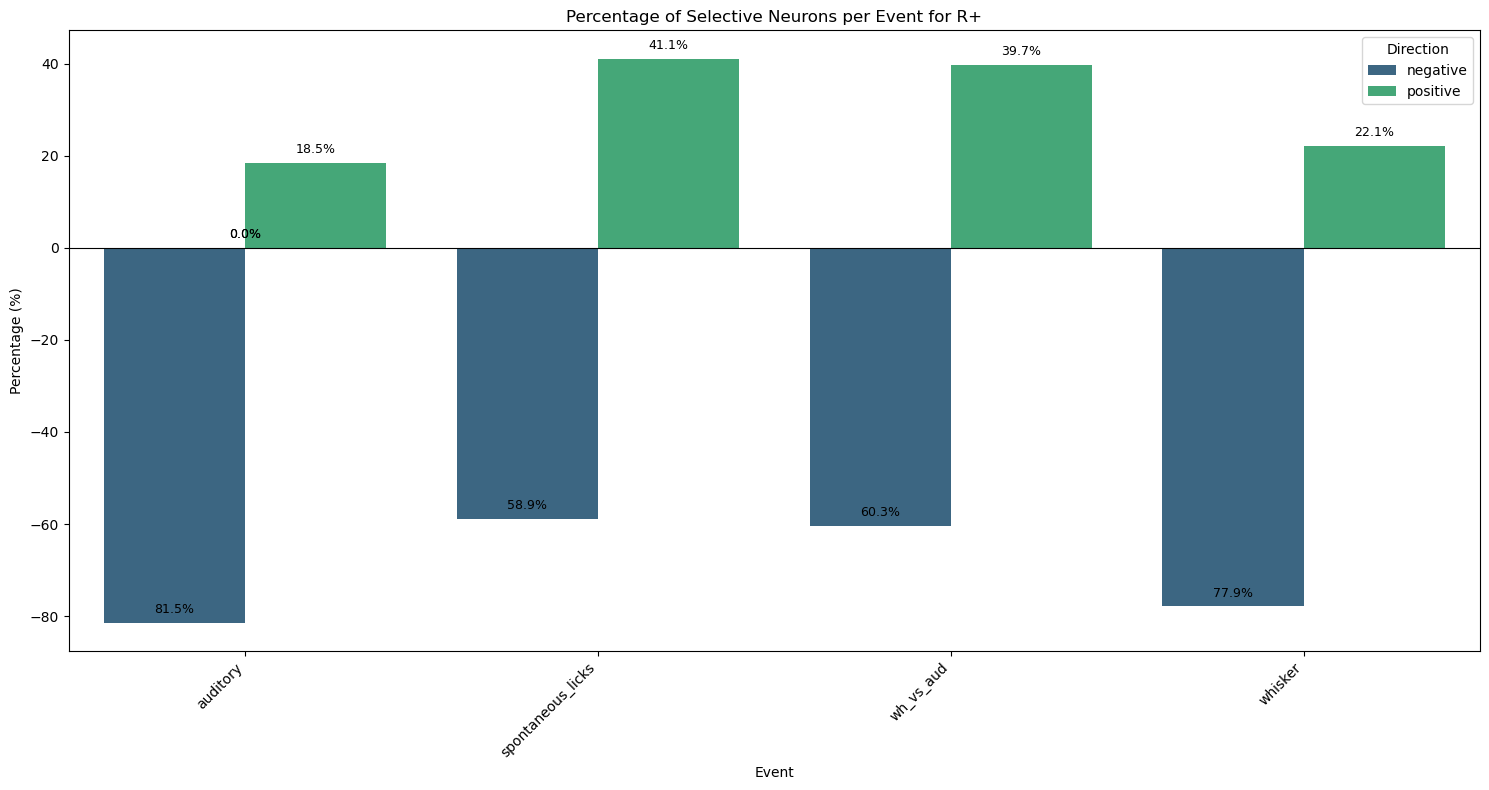

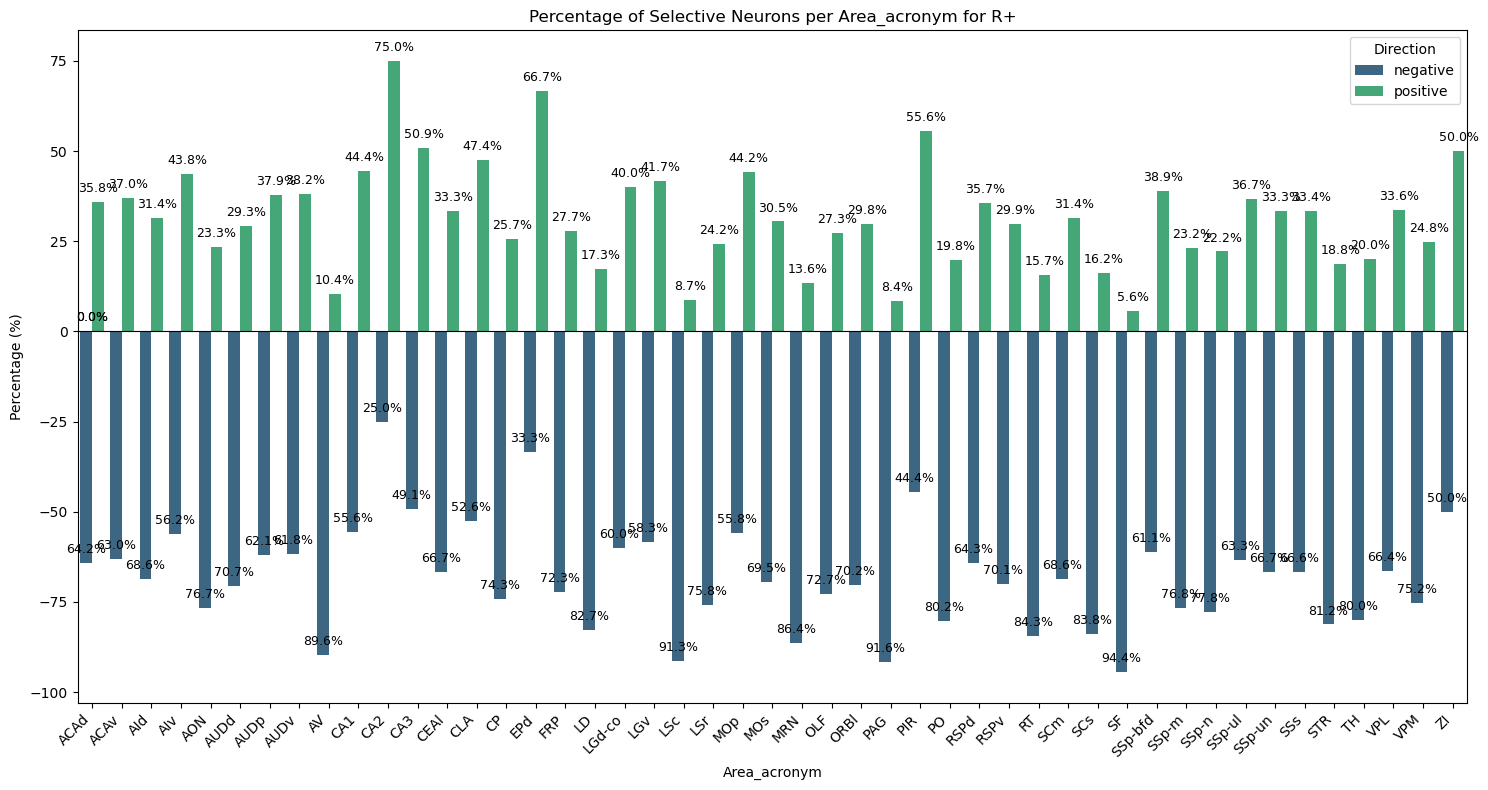

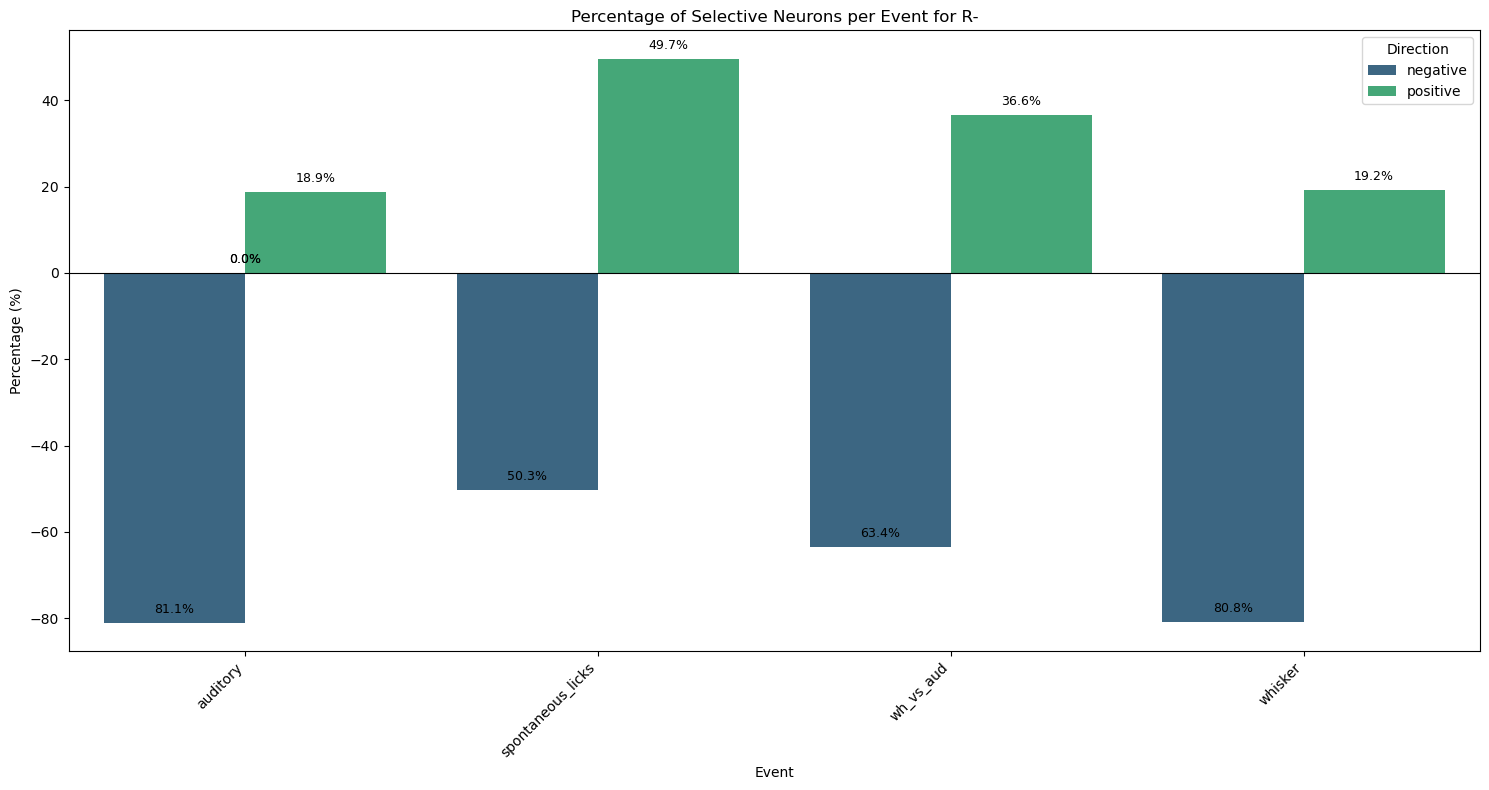

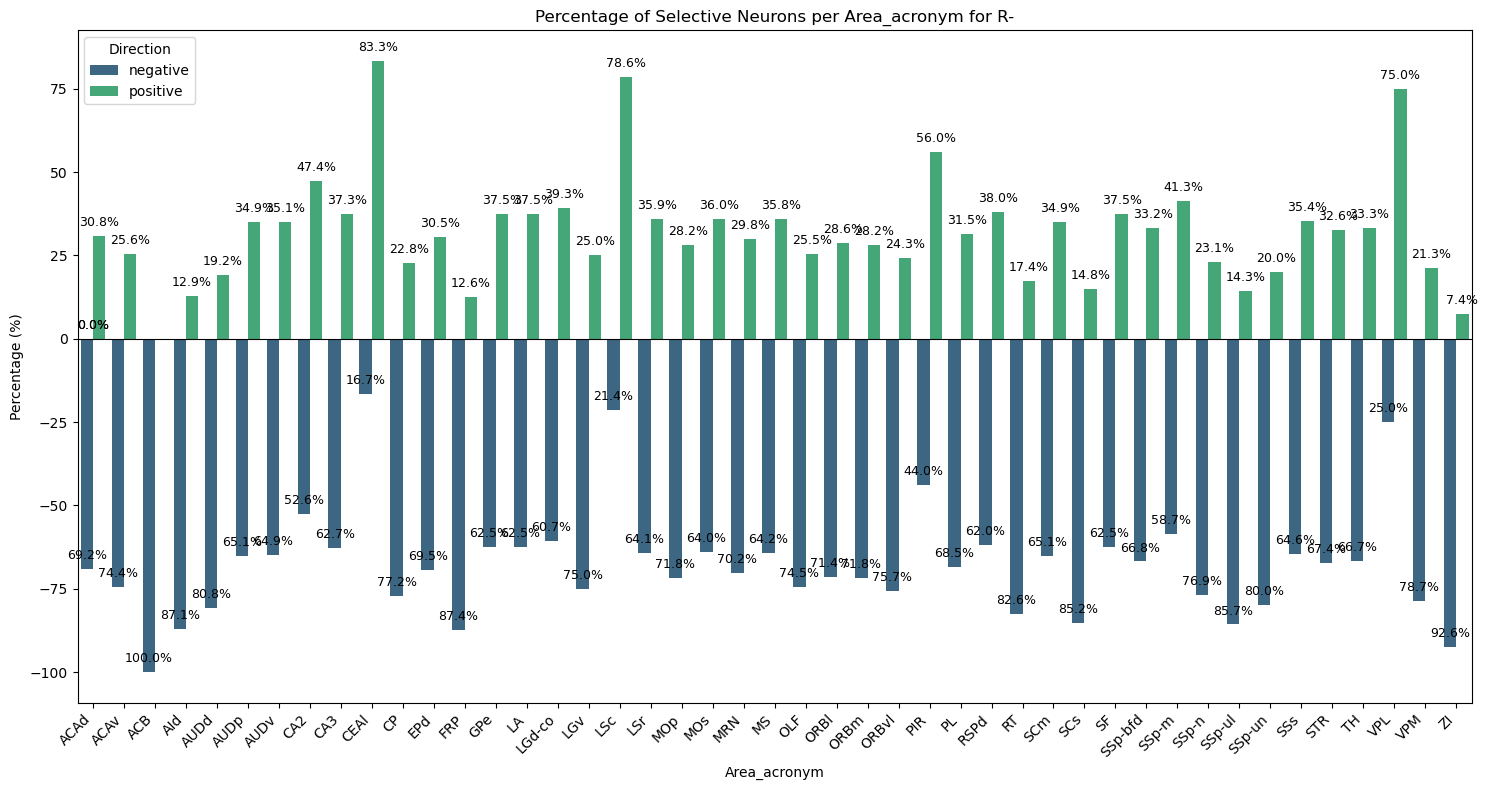

In [47]:
for wh_reward in ['R+', 'R-']:
    # To plot per event
    plot_selectivity_direction2(df, by='event', filter_value='', wh_reward = wh_reward)

    # To plot per area_acronym
    plot_selectivity_direction2(df, by='area_acronym', filter_value='', wh_reward = wh_reward)

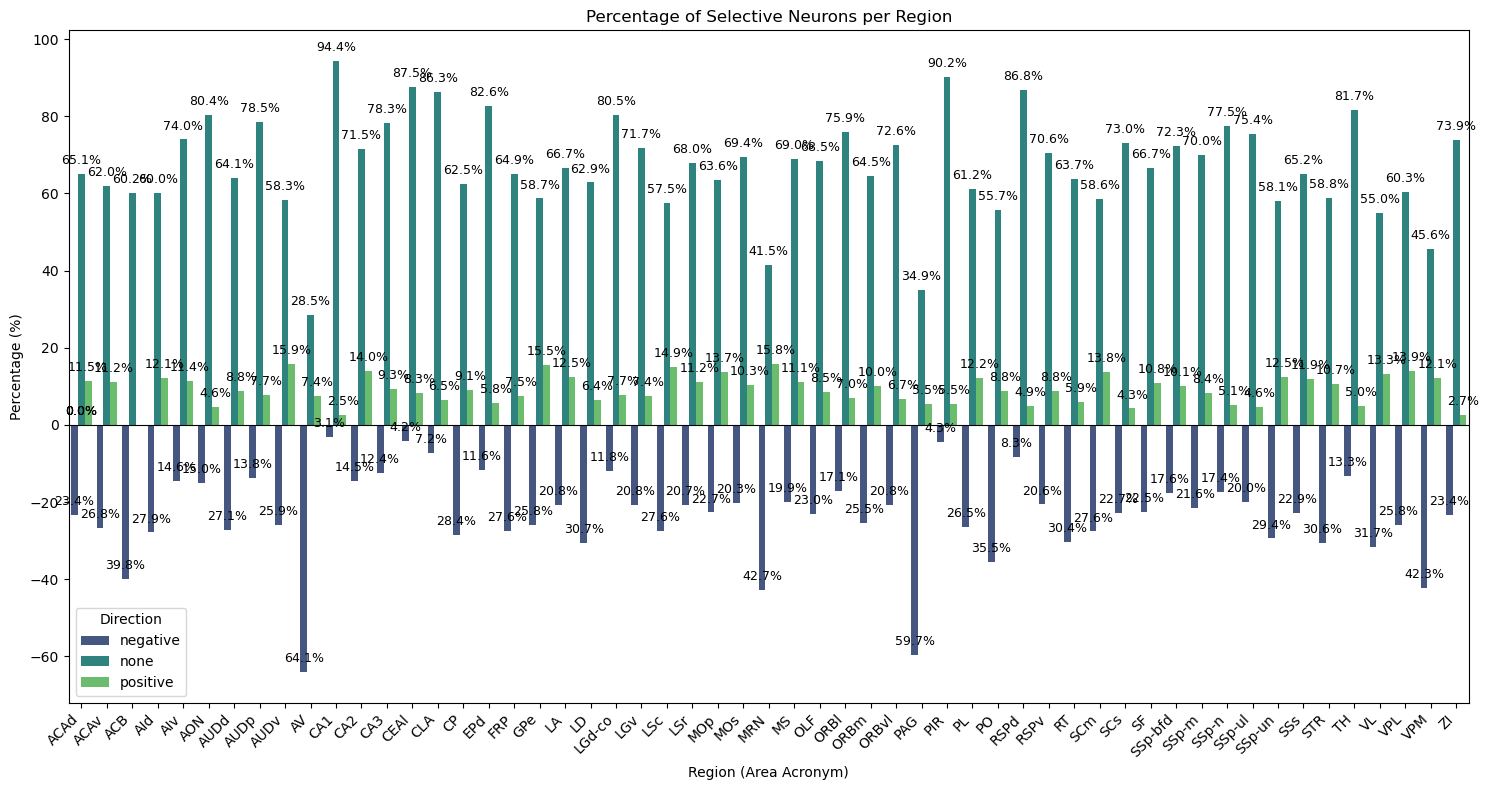

In [ ]:
plot_selectivity_direction_area(df, event='')

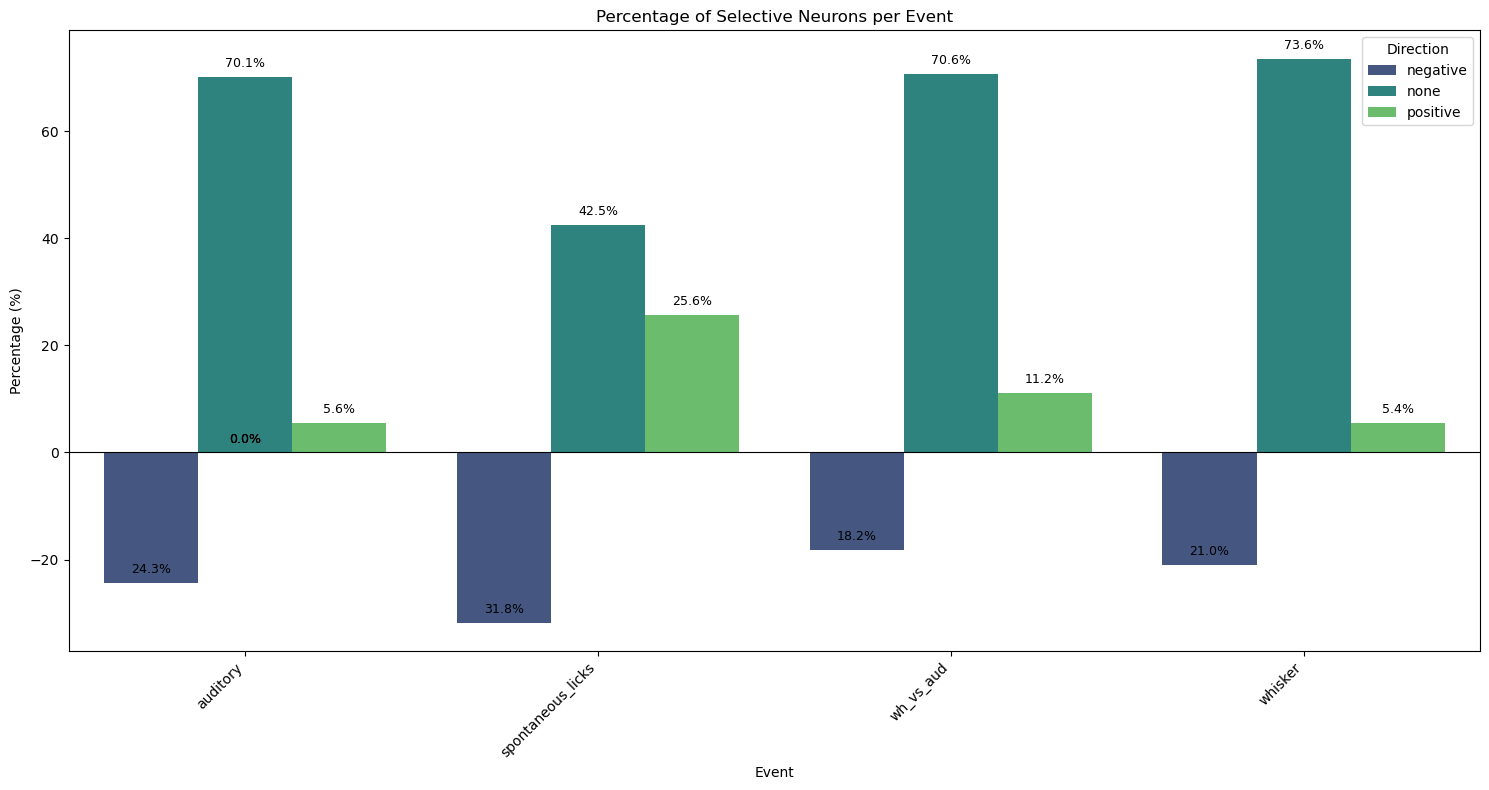

In [ ]:
#plot_selectivity_direction_mice(df)
#plot_selectivity_direction_event_direction(df)
#plot_selectivity_direction_event_context(df)
plot_selectivity_direction_event(df)
# axe en bas reste positive - override 
# A faire par 

In [ ]:
def plot_selectivity_direction(df, by='event', filter_value=''):

    # If filtering by event or area_acronym, only take rows corresponding to the given filter_value
    if filter_value != '':
        df = df[df[by] == filter_value]

    # Group by the specified parameter and direction to calculate counts
    selective_counts = df.groupby([by, 'direction']).size().reset_index(name='count')

    # Total counts for normalization purposes
    total_counts = selective_counts.groupby(by)['count'].sum().reset_index(name='total')

    # Merge to compute percentage of selectivity per specified parameter
    selective_percentages = selective_counts.merge(total_counts, on=by)
    selective_percentages['percentage'] = (selective_percentages['count'] / selective_percentages['total']) * 100

    # Adjust visualization values:
    # - Keep positive responses as-is
    # - For negative responses, map their magnitude to "below the baseline"
    selective_percentages['visual_percentage'] = selective_percentages.apply(
        lambda row: -row['percentage'] if row['direction'] == 'negative' else row['percentage'],
        axis=1
    )

    # Plotting
    plt.figure(figsize=(15, 8))

    # Create the bar plot with seaborn
    ax = sns.barplot(
        data=selective_percentages,
        x=by,
        y='visual_percentage',
        hue='direction',
        dodge=True,
        palette='viridis'
    )

    # Annotate the bars
    for p in ax.patches:
        percentage = f"{abs(p.get_height()):.1f}%"  # Always annotate using magnitude
        ax.annotate(
            percentage,
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center',
            va='bottom',
            fontsize=9,
            color='black',
            xytext=(0, 5),
            textcoords='offset points'
        )

    # Adjust legends to avoid duplicates
    handles, labels = ax.get_legend_handles_labels()
    unique_labels = dict(zip(labels, handles))
    ax.legend(unique_labels.values(), unique_labels.keys(), title='Direction')

    # Set axis labels and titles
    if filter_value != '':
        title = f'Percentage of Selective Neurons per {by.capitalize()} for {filter_value}'
    else:
        title = f'Percentage of Selective Neurons per {by.capitalize()}'

    plt.axhline(0, color='black', linewidth=0.8)  # Reference line at baseline
    plt.title(title)
    plt.ylabel('Percentage (%)')
    plt.xlabel(by.capitalize())
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

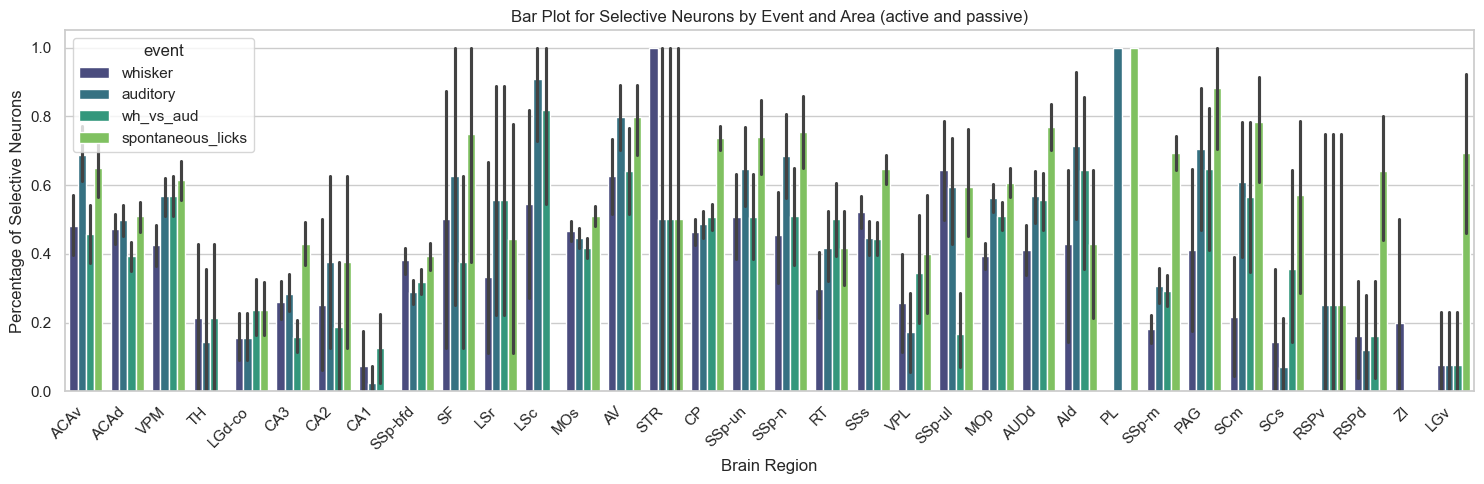

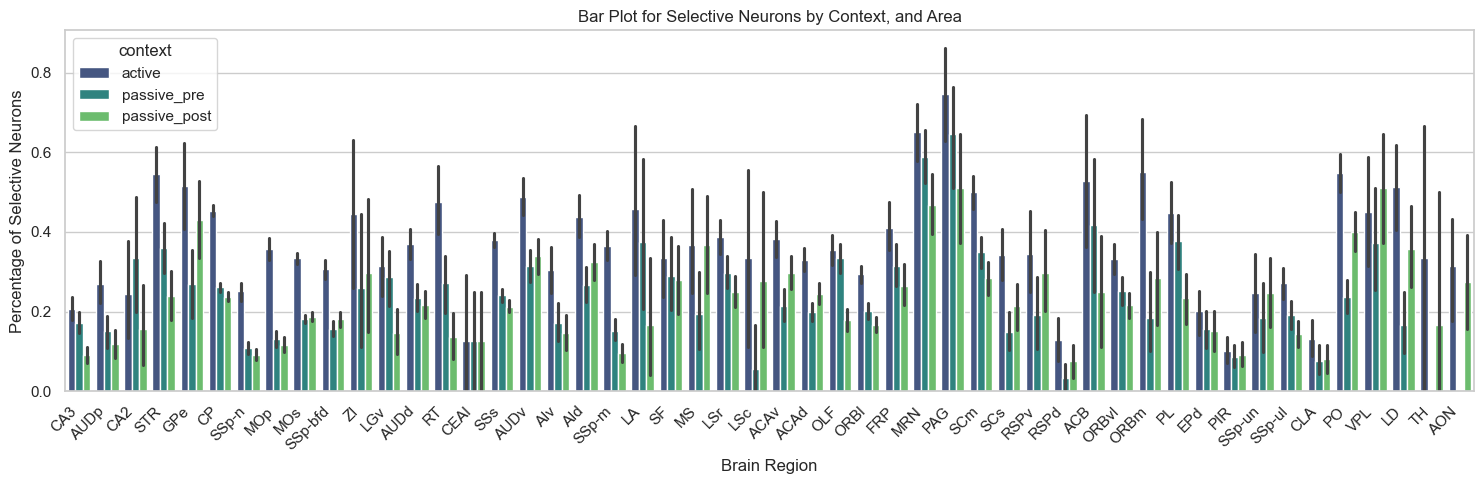

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the seaborn style
sns.set(style="whitegrid")

def plot_by_event(df, has_context = 0):
    if has_context != 0:
        df = df[df['has context'] == has_context]
        title = 'Bar Plot for Selective Neurons by Event and Area (active and passive)' if has_context else 'Bar Plot for Selective Neurons by Event and Area (active)'
    else:
        title = 'Bar Plot for Selective Neurons by Event and Area'
    plt.figure(figsize=(15, 5))
    sns.barplot(x='area_acronym', y='selective', hue='event', data=df, palette='viridis')
    plt.title(title)
    plt.xlabel('Brain Region')
    plt.ylabel('Percentage of Selective Neurons')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def plot_by_context(df):
    plt.figure(figsize=(15, 5))
    sns.barplot(x='area_acronym', y='selective', hue='context', data=df, palette='viridis')
    plt.title('Bar Plot for Selective Neurons by Context, and Area')
    plt.xlabel('Brain Region')
    plt.ylabel('Percentage of Selective Neurons')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

plot_by_event(df, True)  
plot_by_context(df[df['has context']==False]) 

# Deep analysis with hypothesis

## Event-Specific Hypotheses:


- H1: Selective neurons exhibit event-specific response patterns.

Example: Neuronal selectivity will differ for:
Whisker stimuli vs auditory stimuli.
The whisker vs auditory comparison (post vs post) will show distinct neural activation patterns depending on context and reward presence.
Spontaneous licks might lead to different selectivity, reflecting spontaneous reward-related behavior rather than stimulus-induced selectivity.

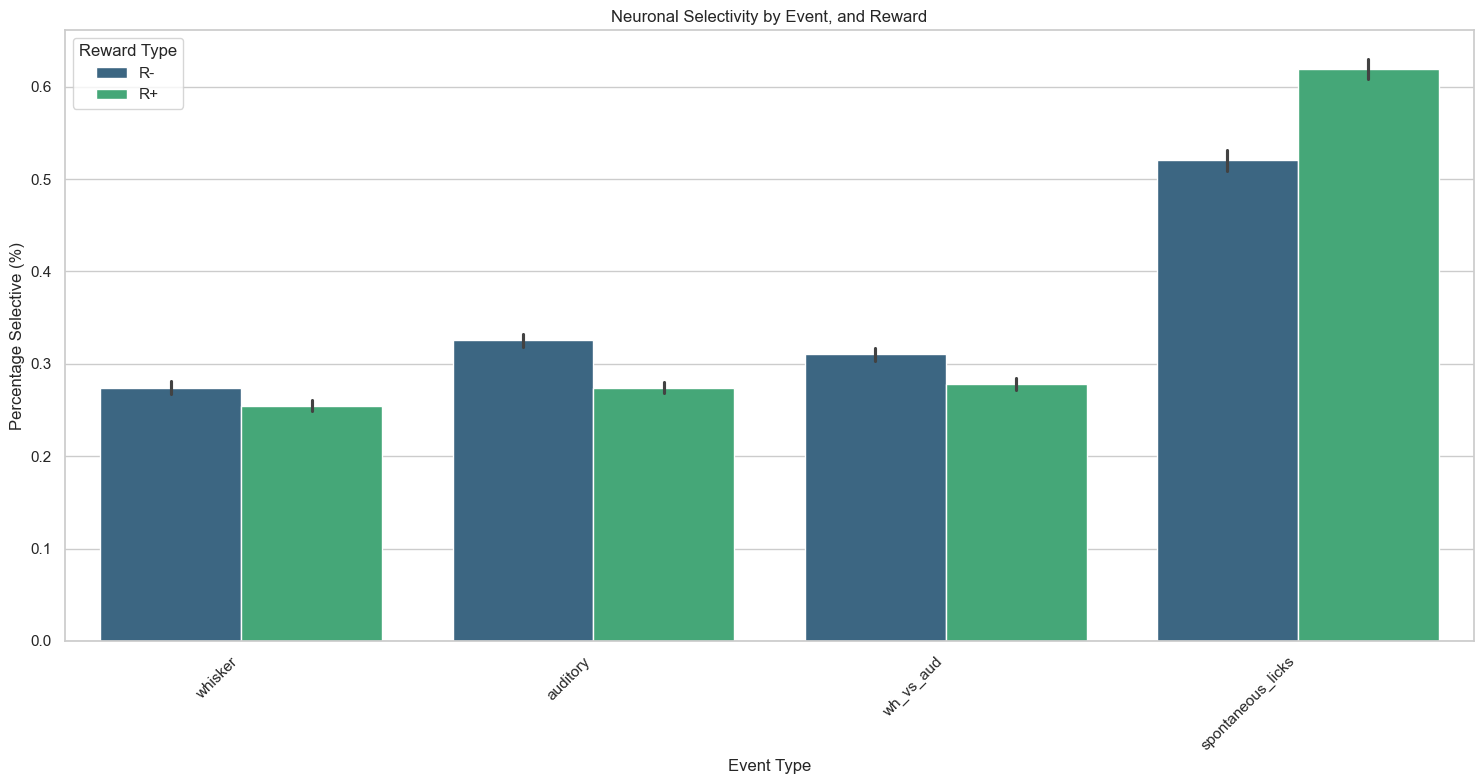

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the seaborn style
sns.set(style="whitegrid")


def plot_events_context_reward(df):
    """
    Create bar plots separated by event type, context, and reward presence (R+ vs R-).
    """

    # Filter only valid events categories if needed
    valid_events = ['whisker', 'auditory', 'wh_vs_aud', 'spontaneous_licks']
    df = df[df['event'].isin(valid_events)]

    # Create barplot comparing these groups by context and reward type
    plt.figure(figsize=(15, 8))
    sns.barplot(
        x='event', 
        y='selective', 
        hue='wh_reward', 
        data=df, 
        palette="viridis",
        dodge=True  # Separate bars by reward type
    )

    # Add plot titles and labels
    plt.title('Neuronal Selectivity by Event, and Reward')
    plt.xlabel('Event Type')
    plt.ylabel('Percentage Selective (%)')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title="Reward Type")
    plt.tight_layout()
    plt.show()


# Call the plotting function
plot_events_context_reward(df)


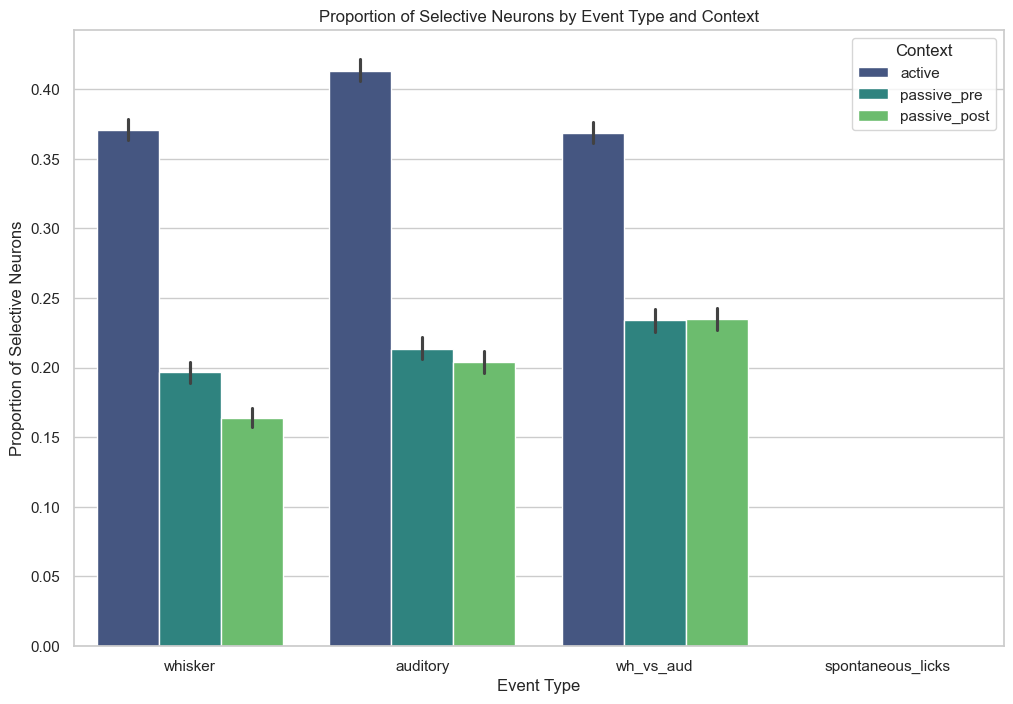

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(
    x='event',
    y='selective',
    hue='context',
    hue_order=['active', 'passive_pre', 'passive_post'],
    data=df,
    palette='viridis'
)

# Add plot titles and labels
plt.title('Proportion of Selective Neurons by Event Type and Context')
plt.xlabel('Event Type')
plt.ylabel('Proportion of Selective Neurons')
plt.legend(title='Context')

plt.show()

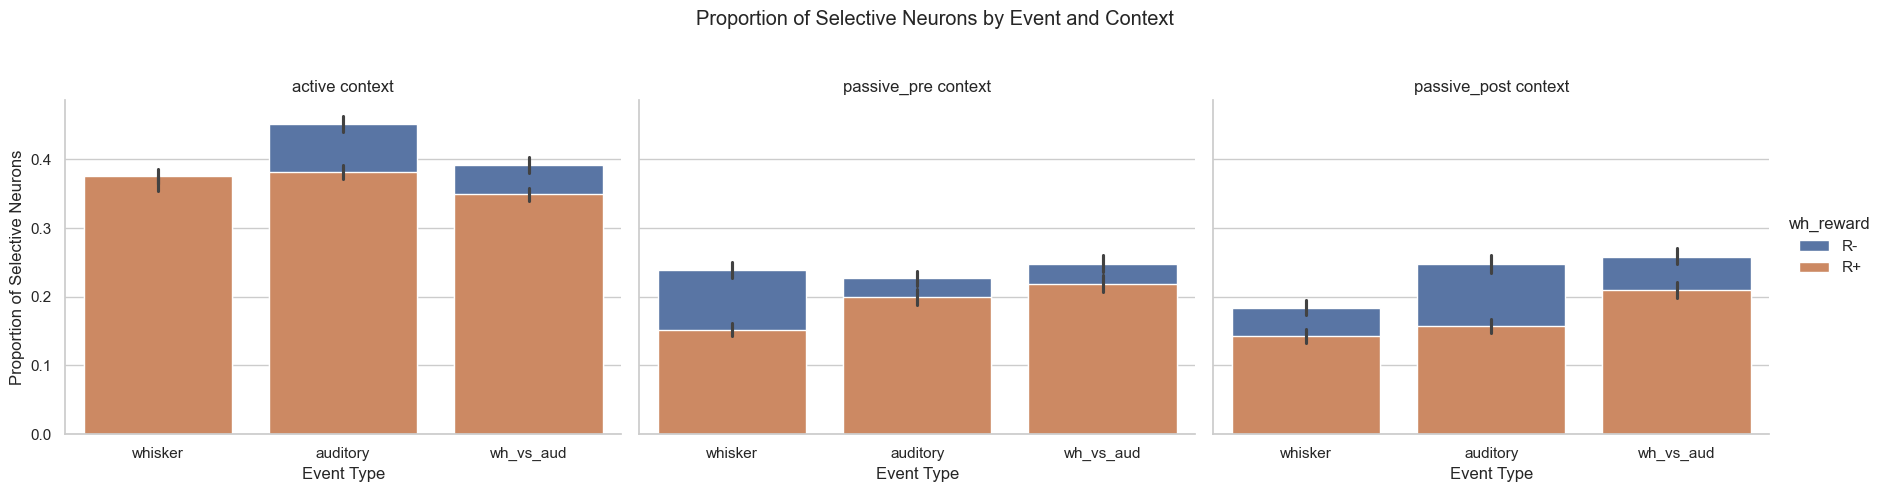

In [74]:
# Filter out spontaneous licks by removing NaN contexts
df_filtered = df[df['context'].notna()]

# Set seaborn theme
sns.set(style="whitegrid")

# Create FacetGrid to separate plots for 'active' vs 'passive' context comparisons
g = sns.FacetGrid(
    df_filtered, 
    col="context",  # Separate by context
    hue="wh_reward",  # Separate reward presence
    col_order=["active", "passive_pre", "passive_post"],  # Exclude NaN now
    height=5, 
    aspect=1.2
)

# Map the bar plot to the FacetGrid
g.map(sns.barplot, "event", "selective", order=df_filtered['event'].unique(), dodge=True)

# Add legend, titles, and other aesthetics
g.add_legend()
g.set_axis_labels("Event Type", "Proportion of Selective Neurons")
g.set_titles("{col_name} context")
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Proportion of Selective Neurons by Event and Context')

# Display the plot
plt.show()

### Spontaneous_licks comparison

Event Type Comparison:

Each category on the x-axis (spontaneous_licks, whisker, and auditory) represents a specific event type.
The shape of the violins reflects the distribution of selective neuron proportions for that event.
Reward Presence (R+ vs R-):

The hue (blue for R- and orange for R+) shows how selective neuron proportions differ under reward and no-reward conditions for each event type.
If there is a significant difference between the distributions of R+ and R-, it suggests that reward presence influences selectivity.
Distribution Shape:

Wider sections of the violin indicate a higher density of neurons with a particular selectivity proportion.
Narrow sections indicate fewer neurons in that range.
Key Observations:

Spontaneous Licks:
Look at whether the shapes of the R+ and R- violins differ significantly. If the distributions overlap heavily, reward presence might not strongly influence selectivity for spontaneous licks.
Whisker and Auditory Events:
Compare the whisker and auditory distributions against spontaneous licks. If their shapes differ significantly, it indicates a distinct selectivity pattern.
Differences between R+ and R- within these events suggest reward-dependent selectivity.

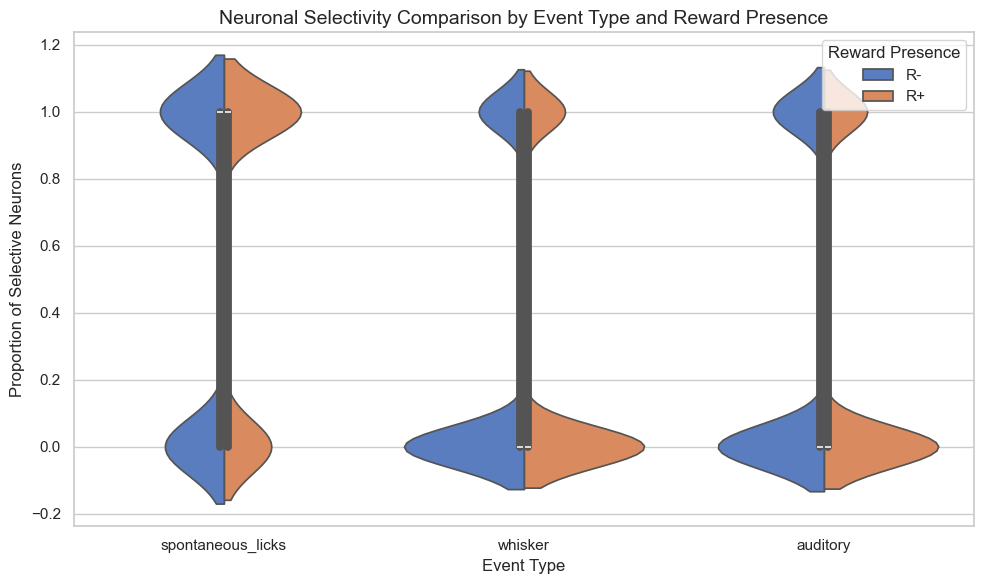

In [76]:
# Set seaborn theme
sns.set(style="whitegrid")

# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(
    data=df, 
    x="event", 
    y="selective", 
    hue="wh_reward", 
    split=True,  # Split the hue values
    palette="muted", 
    order=["spontaneous_licks", "whisker", "auditory"]
)

# Add titles and labels
plt.title("Neuronal Selectivity Comparison by Event Type and Reward Presence", fontsize=14)
plt.xlabel("Event Type", fontsize=12)
plt.ylabel("Proportion of Selective Neurons", fontsize=12)
plt.legend(title="Reward Presence", loc="upper right")

# Show the plot
plt.tight_layout()
plt.show()

### Stimulus Modality Effects
H3: Auditory and whisker stimuli lead to different patterns of neuronal selectivity across regions.


Example: Selectivity might differ between auditory and whisker stimuli because they engage distinct sensory pathways.

Prediction: Separate bar heights for auditory vs. whisker stimuli in each brain area would support this hypothesis.

In [77]:
df

cluster_id ccf_acronym                                     ccf_name  \
0                1         CA3                                    Field CA3   
1                5         CA3                                    Field CA3   
2                9         CA3                                    Field CA3   
3               12         CA3                                    Field CA3   
4               14         CA3                                    Field CA3   
...            ...         ...                                          ...   
122889         644     SSp-m6a  Primary somatosensory area, mouth, layer 6a   
122890         646     SSp-m6a  Primary somatosensory area, mouth, layer 6a   
122891         647     SSp-m6a  Primary somatosensory area, mouth, layer 6a   
122892         650      SSp-m5   Primary somatosensory area, mouth, layer 5   
122893         658      SSp-m4   Primary somatosensory area, mouth, layer 4   

        ccf_parent_id ccf_parent_acronym                    ccf_parent_name  \
0               375.0                 CA                       Ammon's horn   
1               375.0                 CA                       Ammon's horn   
2               375.0                 CA                       Ammon's horn   
3               375.0                 CA                       Ammon's horn   
4               375.0                 CA                       Ammon's horn   
...               ...                ...                                ...   
122889          345.0              SSp-m  Primary somatosensory area, mouth   
122890          345.0              SSp-m  Primary somatosensory area, mouth   
122891          345.0              SSp-m  Primary somatosensory area, mouth   
122892          345.0              SSp-m  Primary somatosensory area, mouth   
122893          345.0              SSp-m  Primary somatosensory area, mouth   

                                              spike_times  \
0       [1.10997831e-02 3.79359254e-01 4.41958031e-01 ...   
1       [8.50683378e-01 8.61316503e-01 8.73749594e-01 ...   
2       [8.57983235e-02 1.90962935e-01 2.93227604e-01 ...   
3       [8.19650651e-02 1.73179949e+00 2.62854864e+00 ...   
4       [4.24688368e+00 5.92881749e+00 6.04198194e+00 ...   
...                                                   ...   
122889  [4.82992796e-02 3.64093569e+00 4.10362446e+00 ...   
122890  [   4.45451922    5.01817748    5.58706533    ...   
122891  [3.12295342e-01 3.82394296e-01 5.38191972e-01 ...   
122892  [1.98969965e+00 2.33309120e+00 3.46880493e+00 ...   
122893  [  13.68601619   13.70001598   25.09173739   2...   

                     mouse_id context              event  ... Transformed AUC  \
0       AB120_20240811_143102  active            whisker  ...        0.114714   
1       AB120_20240811_143102  active            whisker  ...        0.088271   
2       AB120_20240811_143102  active            whisker  ...        0.060016   
3       AB120_20240811_143102  active            whisker  ...        0.014756   
4       AB120_20240811_143102  active            whisker  ...        0.081816   
...                       ...     ...                ...  ...             ...   
122889  AB107_20240318_121423     NaN  spontaneous_licks  ...        0.032883   
122890  AB107_20240318_121423     NaN  spontaneous_licks  ...       -0.014349   
122891  AB107_20240318_121423     NaN  spontaneous_licks  ...        0.137755   
122892  AB107_20240318_121423     NaN  spontaneous_licks  ...        0.065957   
122893  AB107_20240318_121423     NaN  spontaneous_licks  ...        0.340906   

       p-values positive  p-values negative  selective  direction  pre_time  \
0                  0.812              0.188      False       none       0.2   
1                  0.892              0.108      False       none       0.2   
2                  0.879              0.122      False       none       0.2   
3                  0.771              0.247      False       none       0.2   
4        

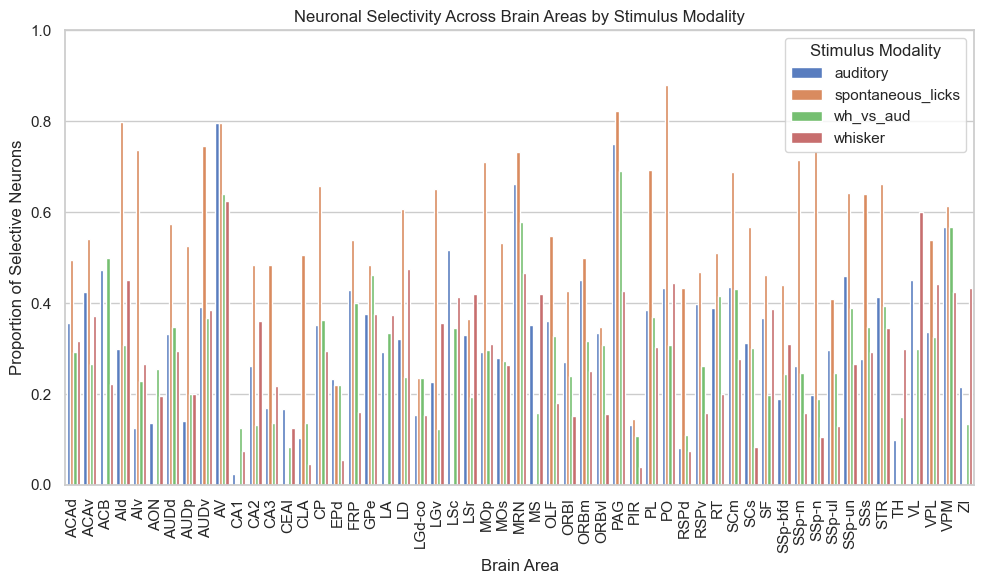

In [85]:
# Check if necessary columns exist
required_columns = ["area_acronym", "event", "selective"]
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    raise ValueError(f"The following columns are missing in the DataFrame: {missing_columns}")

# Ensure 'selective' column is numeric for aggregation
if not pd.api.types.is_numeric_dtype(df["selective"]):
    df["selective"] = pd.to_numeric(df["selective"], errors="coerce")


# Aggregate data by area_acronym and event
df_grouped = df.groupby(["area_acronym", "event"], as_index=False)["selective"].mean()

# Create the grouped bar plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_grouped,
    x="area_acronym", 
    y="selective", 
    hue="event",  # Separate by auditory and whisker
    palette="muted",
)

# Add labels and title
plt.xlabel("Brain Area")
plt.xticks(rotation = 90)
plt.ylabel("Proportion of Selective Neurons")
plt.title("Neuronal Selectivity Across Brain Areas by Stimulus Modality")
plt.legend(title="Stimulus Modality", loc="upper right")
plt.ylim(0, 1)  # Adjust Y-axis range as needed

# Display the plot
plt.tight_layout()
plt.show()


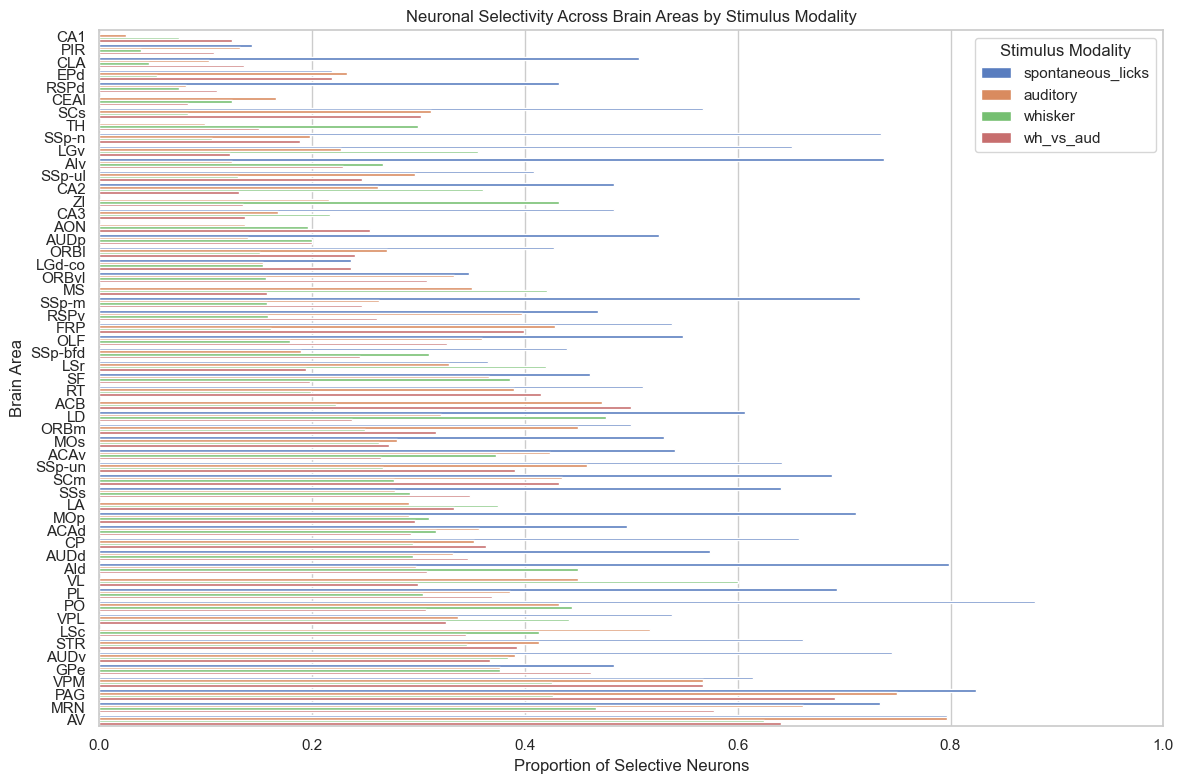

In [86]:
# Check if necessary columns exist
required_columns = ["area_acronym", "event", "selective"]
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    raise ValueError(f"The following columns are missing in the DataFrame: {missing_columns}")

# Ensure 'selective' column is numeric for aggregation
if not pd.api.types.is_numeric_dtype(df["selective"]):
    df["selective"] = pd.to_numeric(df["selective"], errors="coerce")


# Aggregate data by area_acronym and event
df_grouped = df.groupby(["area_acronym", "event"], as_index=False)["selective"].mean()

# Sort data by mean value for better visualization (optional but can improve plot clarity)
df_grouped = df_grouped.sort_values(by="selective", ascending=True)

# Create horizontal grouped bar plot
plt.figure(figsize=(12, 8))  # Increase figure size for better visualization
sns.barplot(
    data=df_grouped,
    y="area_acronym",  # Switch to horizontal plot
    x="selective",
    hue="event",
    palette="muted",
)

# Add labels and title
plt.ylabel("Brain Area")
plt.xlabel("Proportion of Selective Neurons")
plt.title("Neuronal Selectivity Across Brain Areas by Stimulus Modality")
plt.legend(title="Stimulus Modality", loc="upper right")
plt.xlim(0, 1)  # Adjust x-axis range

# Display the plot
plt.tight_layout()
plt.show()


## H3: Reward presence leads to event-specific selectivity changes.
Example: Neural selectivity will differ for:
Whisker stimuli with R+ rewards vs whisker stimuli with R- rewards.
Auditory stimuli with R+ rewards vs auditory stimuli with R- rewards.
Prediction: Comparing auditory vs whisker selectivity under these conditions should show distinct patterns.

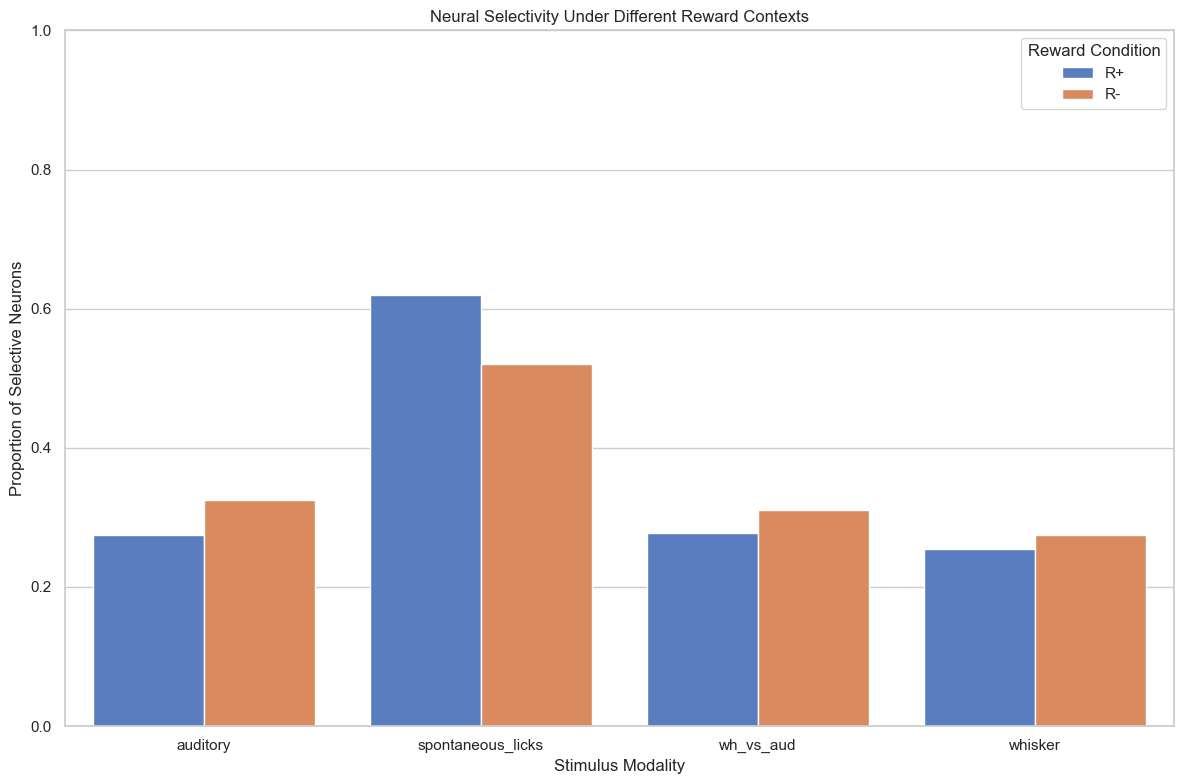

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



# Aggregate data by event type and reward condition
df_grouped = df.groupby(["event", "wh_reward"], as_index=False)["selective"].mean()

# Create the grouped bar plot
plt.figure(figsize=(12, 8))
sns.barplot(
    data=df_grouped,
    x="event",
    y="selective",
    hue="wh_reward",  # Separate by R+ and R- rewards
    palette="muted"
)

# Add labels and title
plt.xlabel("Stimulus Modality")
plt.ylabel("Proportion of Selective Neurons")
plt.title("Neural Selectivity Under Different Reward Contexts")
plt.legend(title="Reward Condition", loc="upper right")
plt.ylim(0, 1)  # Ensure Y-axis fits proportions between 0 and 1

# Rotate ticks for better clarity
plt.xticks(rotation=0)

# Display the plot
plt.tight_layout()
plt.show()


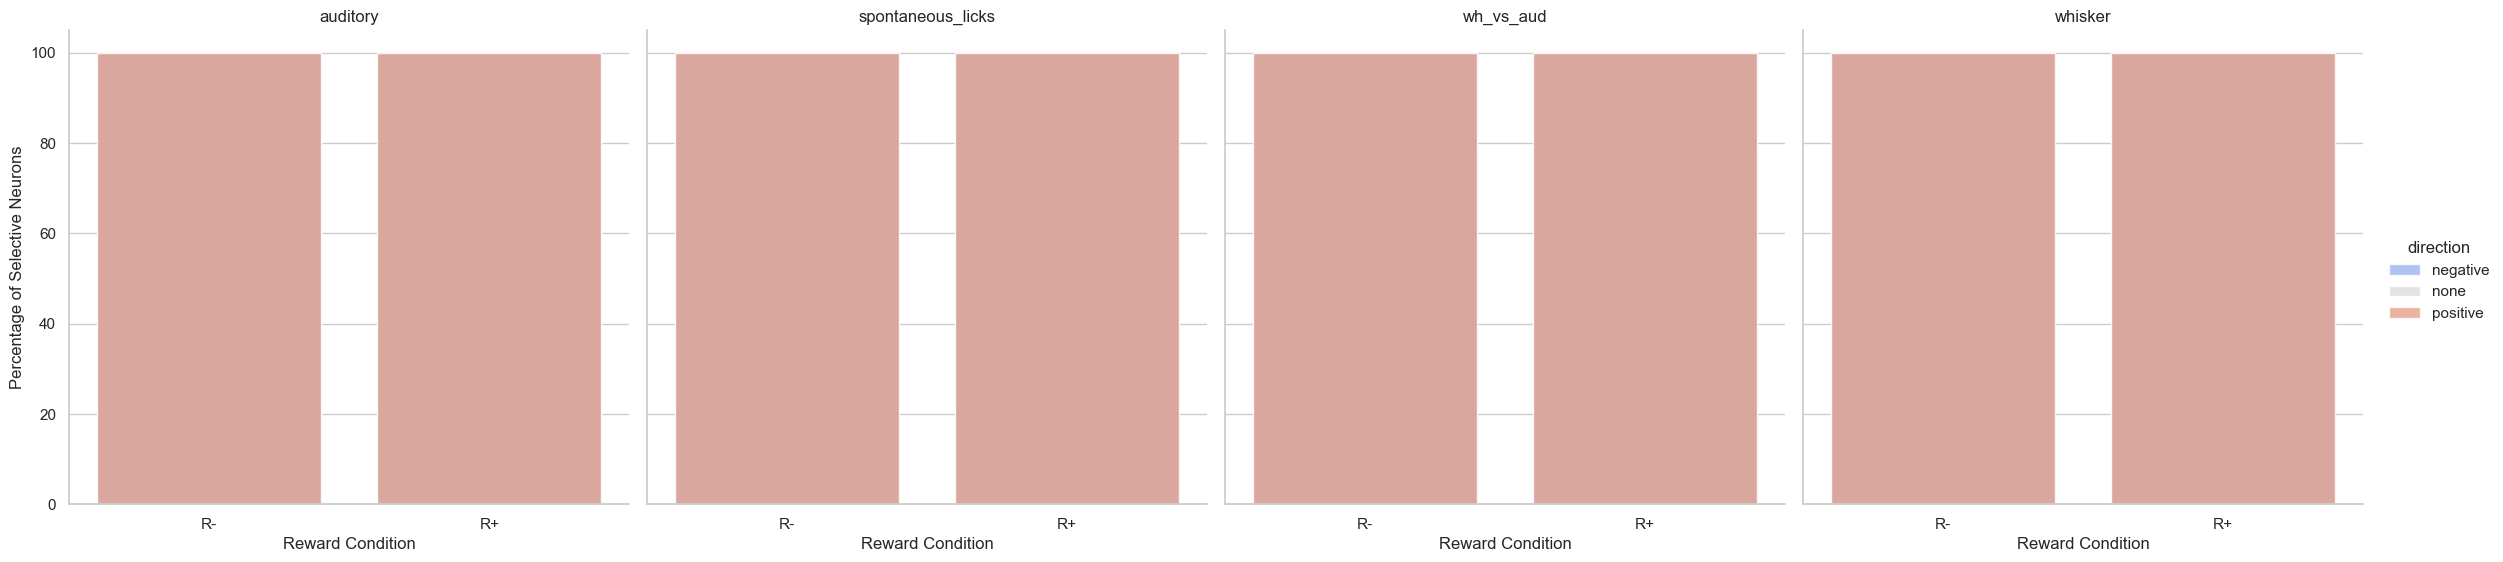

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Aggregate data by event type, reward condition, and direction
df_grouped = df.groupby(["event", "wh_reward", "direction"], as_index=False)["selective"].mean()

# Ensure percentage calculations are normalized by splitting data by positive/negative direction
df_grouped["direction_percentage"] = df_grouped["selective"] * 100  # Convert proportions to percentages

# Set up a FacetGrid for visualizing each "stimulus modality" separately
g = sns.FacetGrid(
    df_grouped,
    col="event",  # Separate each event type into its own facet
    hue="direction",  # Map direction (positive/negative) with color coding
    palette="coolwarm",
    sharey=True,
    height=6,
)

# Map bar plots to each facet
g.map(sns.barplot, "wh_reward", "direction_percentage", order=["R-", "R+"], alpha=0.8)

# Customize axes, legends, and titles
g.set_axis_labels("Reward Condition", "Percentage of Selective Neurons")
g.set_titles("{col_name}")
g.add_legend()
plt.subplots_adjust(top=0.9)  # Allow space for titles and other elements

# Display the plot
plt.show()


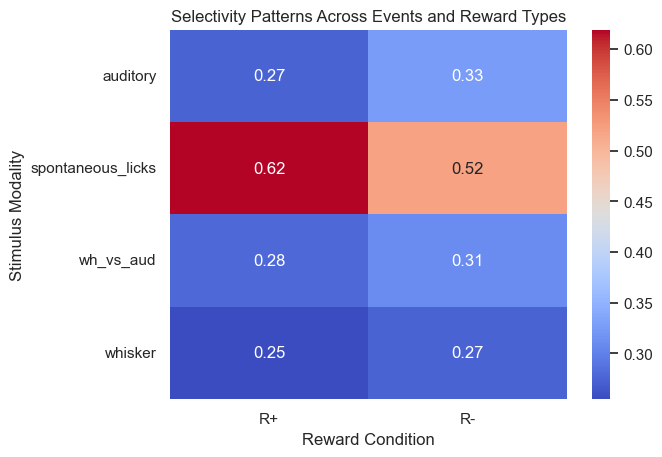

In [98]:
df_pivot = df.pivot_table(values="selective", index="event", columns=["wh_reward"], aggfunc="mean")

sns.heatmap(df_pivot, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Selectivity Patterns Across Events and Reward Types")
plt.ylabel("Stimulus Modality")
plt.xlabel("Reward Condition")
plt.show()


### H4: The interaction of reward type and event leads to differential selectivity.
Example: For whisker vs auditory comparisons, reward presence may lead to greater selectivity for one stimulus type over the other depending on reward probability or context.
Prediction: This would manifest as different bar heights between reward types (R+ vs R-) under whisker vs auditory conditions.

In [11]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Convert selective column to numeric safely
#df['selective'] = pd.to_numeric(df['selective'], errors='coerce')  # Convert invalid values to NaN


# Fit the two-way ANOVA model
model = smf.ols('selective ~ C(event) * C(wh_reward)', data=df).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA results
print(anova_table)


ValueError: endog has evaluated to an array with multiple columns that has shape (122404, 2). This occurs when the variable converted to endog is non-numeric (e.g., bool or str).

### H5: Spontaneous licks influence neuronal selectivity independently of auditory or whisker events.
Example: Lick behavior may show distinct selective patterns, especially in areas associated with reward or movement.
Prediction: The spontaneous licks will lead to increased selectivity in areas related to reward prediction or motor preparation.

In [12]:
import statsmodels.api as sm


# Create a binary variable to identify spontaneous licks
df['spontaneous_licks'] = df['event'] == 'spontaneous_licks'  # Map the event condition to a boolean
df['spontaneous_licks'] = df['spontaneous_licks'].astype(int)  # Convert boolean to integer (0 or 1)

# Ensure neuronal selectivity is valid numeric or boolean
df['selective'] = pd.to_numeric(df['selective'], errors='coerce')
df = df.dropna(subset=['selective'])  # Drop NaN rows


# Create the model
X = df[['spontaneous_licks']]  # Independent variable
y = df['selective']  # Dependent variable

# Add constant term for intercept
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X).fit()

# Display results
print(model.summary())


/var/folders/p6/m1p5k4zj0yn9mk66d_dh7pn40000gn/T/ipykernel_1096/1358949039.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['spontaneous_licks'] = df['event'] == 'spontaneous_licks'  # Map the event condition to a boolean
/var/folders/p6/m1p5k4zj0yn9mk66d_dh7pn40000gn/T/ipykernel_1096/1358949039.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['spontaneous_licks'] = df['spontaneous_licks'].astype(int)  # Convert boolean to integer (0 or 1)
/var/folders/p6/m1p5k4zj0yn9mk66d_dh7pn40000gn/T/ipykern

Optimization terminated successfully.
         Current function value: 0.608892
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              selective   No. Observations:               122404
Model:                          Logit   Df Residuals:                   122402
Method:                           MLE   Df Model:                            1
Date:                Tue, 10 Dec 2024   Pseudo R-squ.:                 0.03155
Time:                        13:58:44   Log-Likelihood:                -74531.
converged:                       True   LL-Null:                       -76959.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.9165      0.007   -135.310      0.000      -0.930      -0.903
spontane

## Interaction wise hypothesis

### H6: Context × Event interaction hypothesis.
Example: Whisker stimuli in the active context may lead to higher selectivity compared to auditory stimuli in the same context, but this may reverse in the passive context.
Prediction: Comparing bar plots for whisker vs auditory events across active/passive contexts should reveal this differential response pattern.

### H7: Event × Reward interaction hypothesis.
Example: Selectivity for whisker stimuli will differ from auditory stimuli when comparing R+ vs R- across different event types.
Prediction: For auditory stimuli under R+ reward conditions, neuronal selectivity might be stronger, while whisker responses will exhibit a different trend.

### H8: Context × Reward × Event interaction hypothesis.
Example: The combination of context, reward type, and event type (whisker vs auditory, spontaneous lick) leads to complex neuronal selectivity patterns.
Prediction: Cross-comparisons of bar plots will show that reward effects depend on both event type and the context in which the events are processed.